In [1]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)
library(UBL)

set.seed(1)




options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 500)

load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_finale.Rdata")

df <- df_finale

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 3.6.2"
Loading required package: ggplot2

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.1.0     v purrr   0.3.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'tibble' was built under R version 3.6.2"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"pack


## Data partition

In [2]:
set.seed(1)


sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [3]:
prop.table(table(test$deg_cat))


     fast   NotFast 
0.3517442 0.6482558 

In [4]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    401     402 

## Model

In [5]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [6]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 



+ Fold01.Rep1: nIter=78 
- Fold01.Rep1: nIter=78 
+ Fold02.Rep1: nIter=78 
- Fold02.Rep1: nIter=78 
+ Fold03.Rep1: nIter=78 
- Fold03.Rep1: nIter=78 
+ Fold04.Rep1: nIter=78 
- Fold04.Rep1: nIter=78 
+ Fold05.Rep1: nIter=78 
- Fold05.Rep1: nIter=78 
+ Fold06.Rep1: nIter=78 
- Fold06.Rep1: nIter=78 
+ Fold07.Rep1: nIter=78 
- Fold07.Rep1: nIter=78 
+ Fold08.Rep1: nIter=78 
- Fold08.Rep1: nIter=78 
+ Fold09.Rep1: nIter=78 
- Fold09.Rep1: nIter=78 
+ Fold10.Rep1: nIter=78 
- Fold10.Rep1: nIter=78 
Aggregating results
Selecting tuning parameters
Fitting nIter = 78 on full training set


In [7]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)    # metric = "..." ciò che voglio massimizzare

+ Fold01.Rep1: cost= 0.005941, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost= 0.005941, loss=L2_dual, epsilon=1 
+ Fold01.Rep1: cost=81.491480, loss=L1, epsilon=1 
- Fold01.Rep1: cost=81.491480, loss=L1, epsilon=1 
+ Fold01.Rep1: cost= 0.069300, loss=L2_primal, epsilon=1 
- Fold01.Rep1: cost= 0.069300, loss=L2_primal, epsilon=1 
+ Fold02.Rep1: cost= 0.005941, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost= 0.005941, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost=81.491480, loss=L1, epsilon=1 
- Fold02.Rep1: cost=81.491480, loss=L1, epsilon=1 
+ Fold02.Rep1: cost= 0.069300, loss=L2_primal, epsilon=1 
- Fold02.Rep1: cost= 0.069300, loss=L2_primal, epsilon=1 
+ Fold03.Rep1: cost= 0.005941, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost= 0.005941, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost=81.491480, loss=L1, epsilon=1 
- Fold03.Rep1: cost=81.491480, loss=L1, epsilon=1 
+ Fold03.Rep1: cost= 0.069300, loss=L2_primal, epsilon=1 
- Fold03.Rep1: cost= 0.069300, loss=L2_primal, epsilon=1 
+ Fold04.R

## Results

Boosted Logistic Regression 

803 samples
 76 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 723, 723, 722, 723, 723, 723, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  13     0.6936032  0.3873304
  71     0.7184952  0.4369644
  78     0.7525977  0.5025572

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 78.


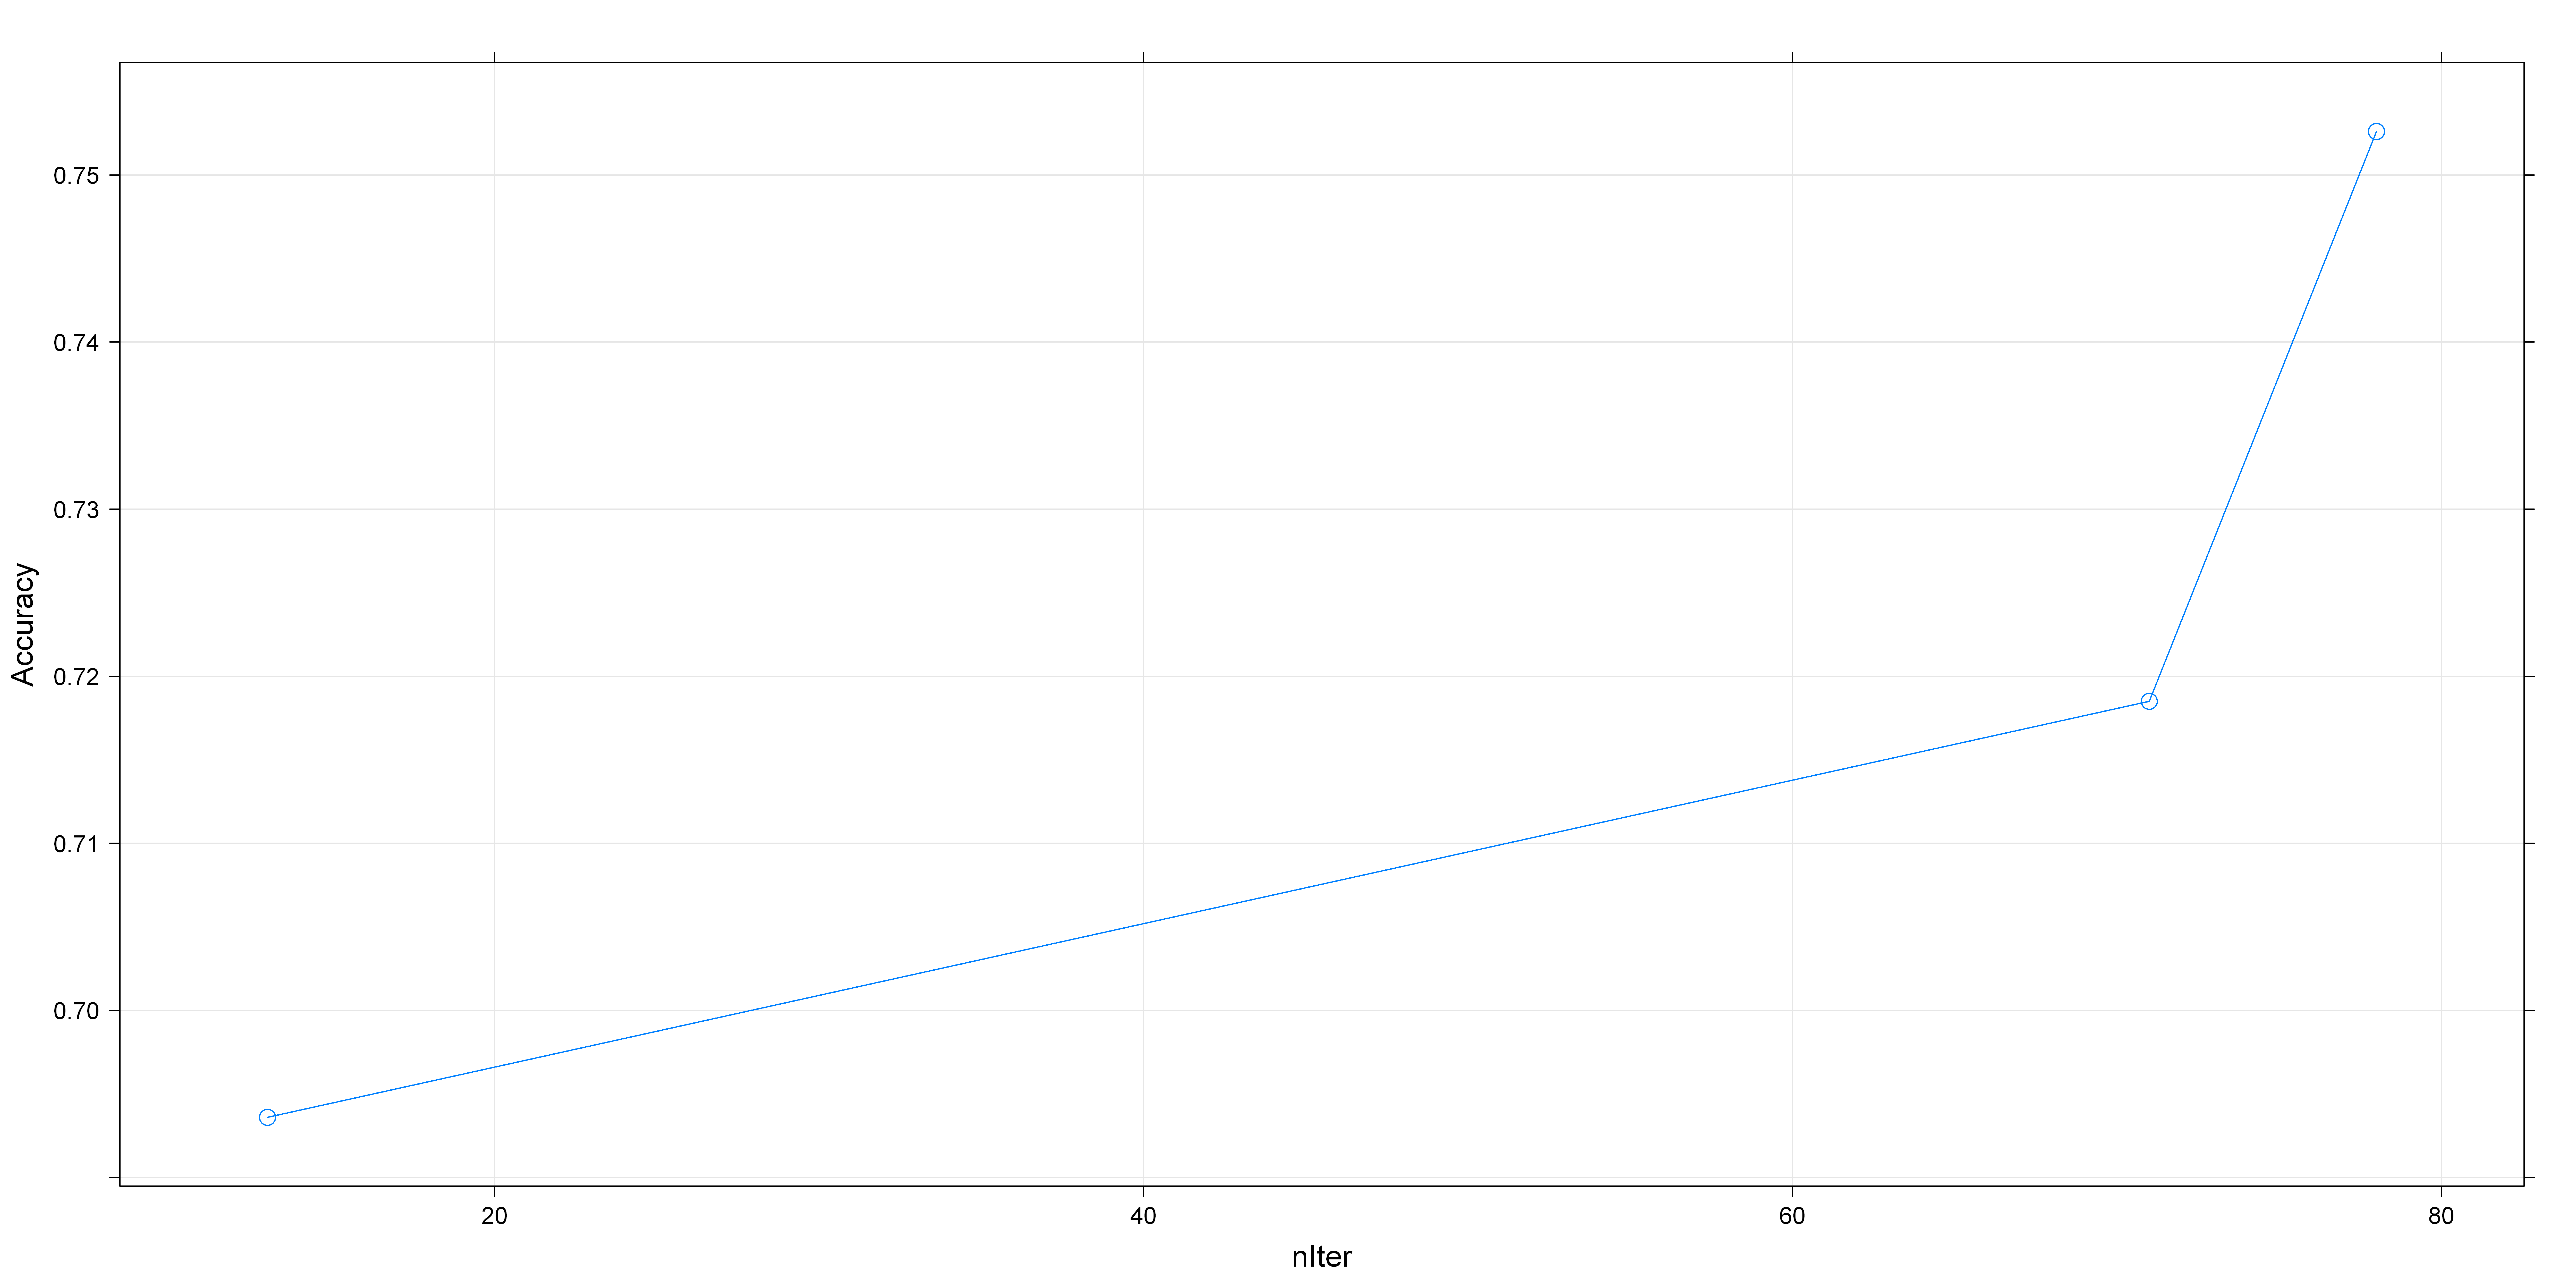

In [8]:
print(model_logitBoost)
plot(model_logitBoost,  cex= 1.5,  xlab = list( cex = 1.4), ylab = list( cex = 1.4), scales = list(x = list(cex=1.1),y=list(cex=1.1)))

Regularized Logistic Regression 

803 samples
 76 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 723, 722, 723, 723, 723, 723, ... 
Resampling results across tuning parameters:

  cost          loss       Accuracy   Kappa    
   0.005940769  L2_dual    0.7410565  0.4820848
   0.069299625  L2_primal  0.7447915  0.4896514
  81.491479521  L1         0.7223969  0.4447723

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 0.06929963, loss =
 L2_primal and epsilon = 1.


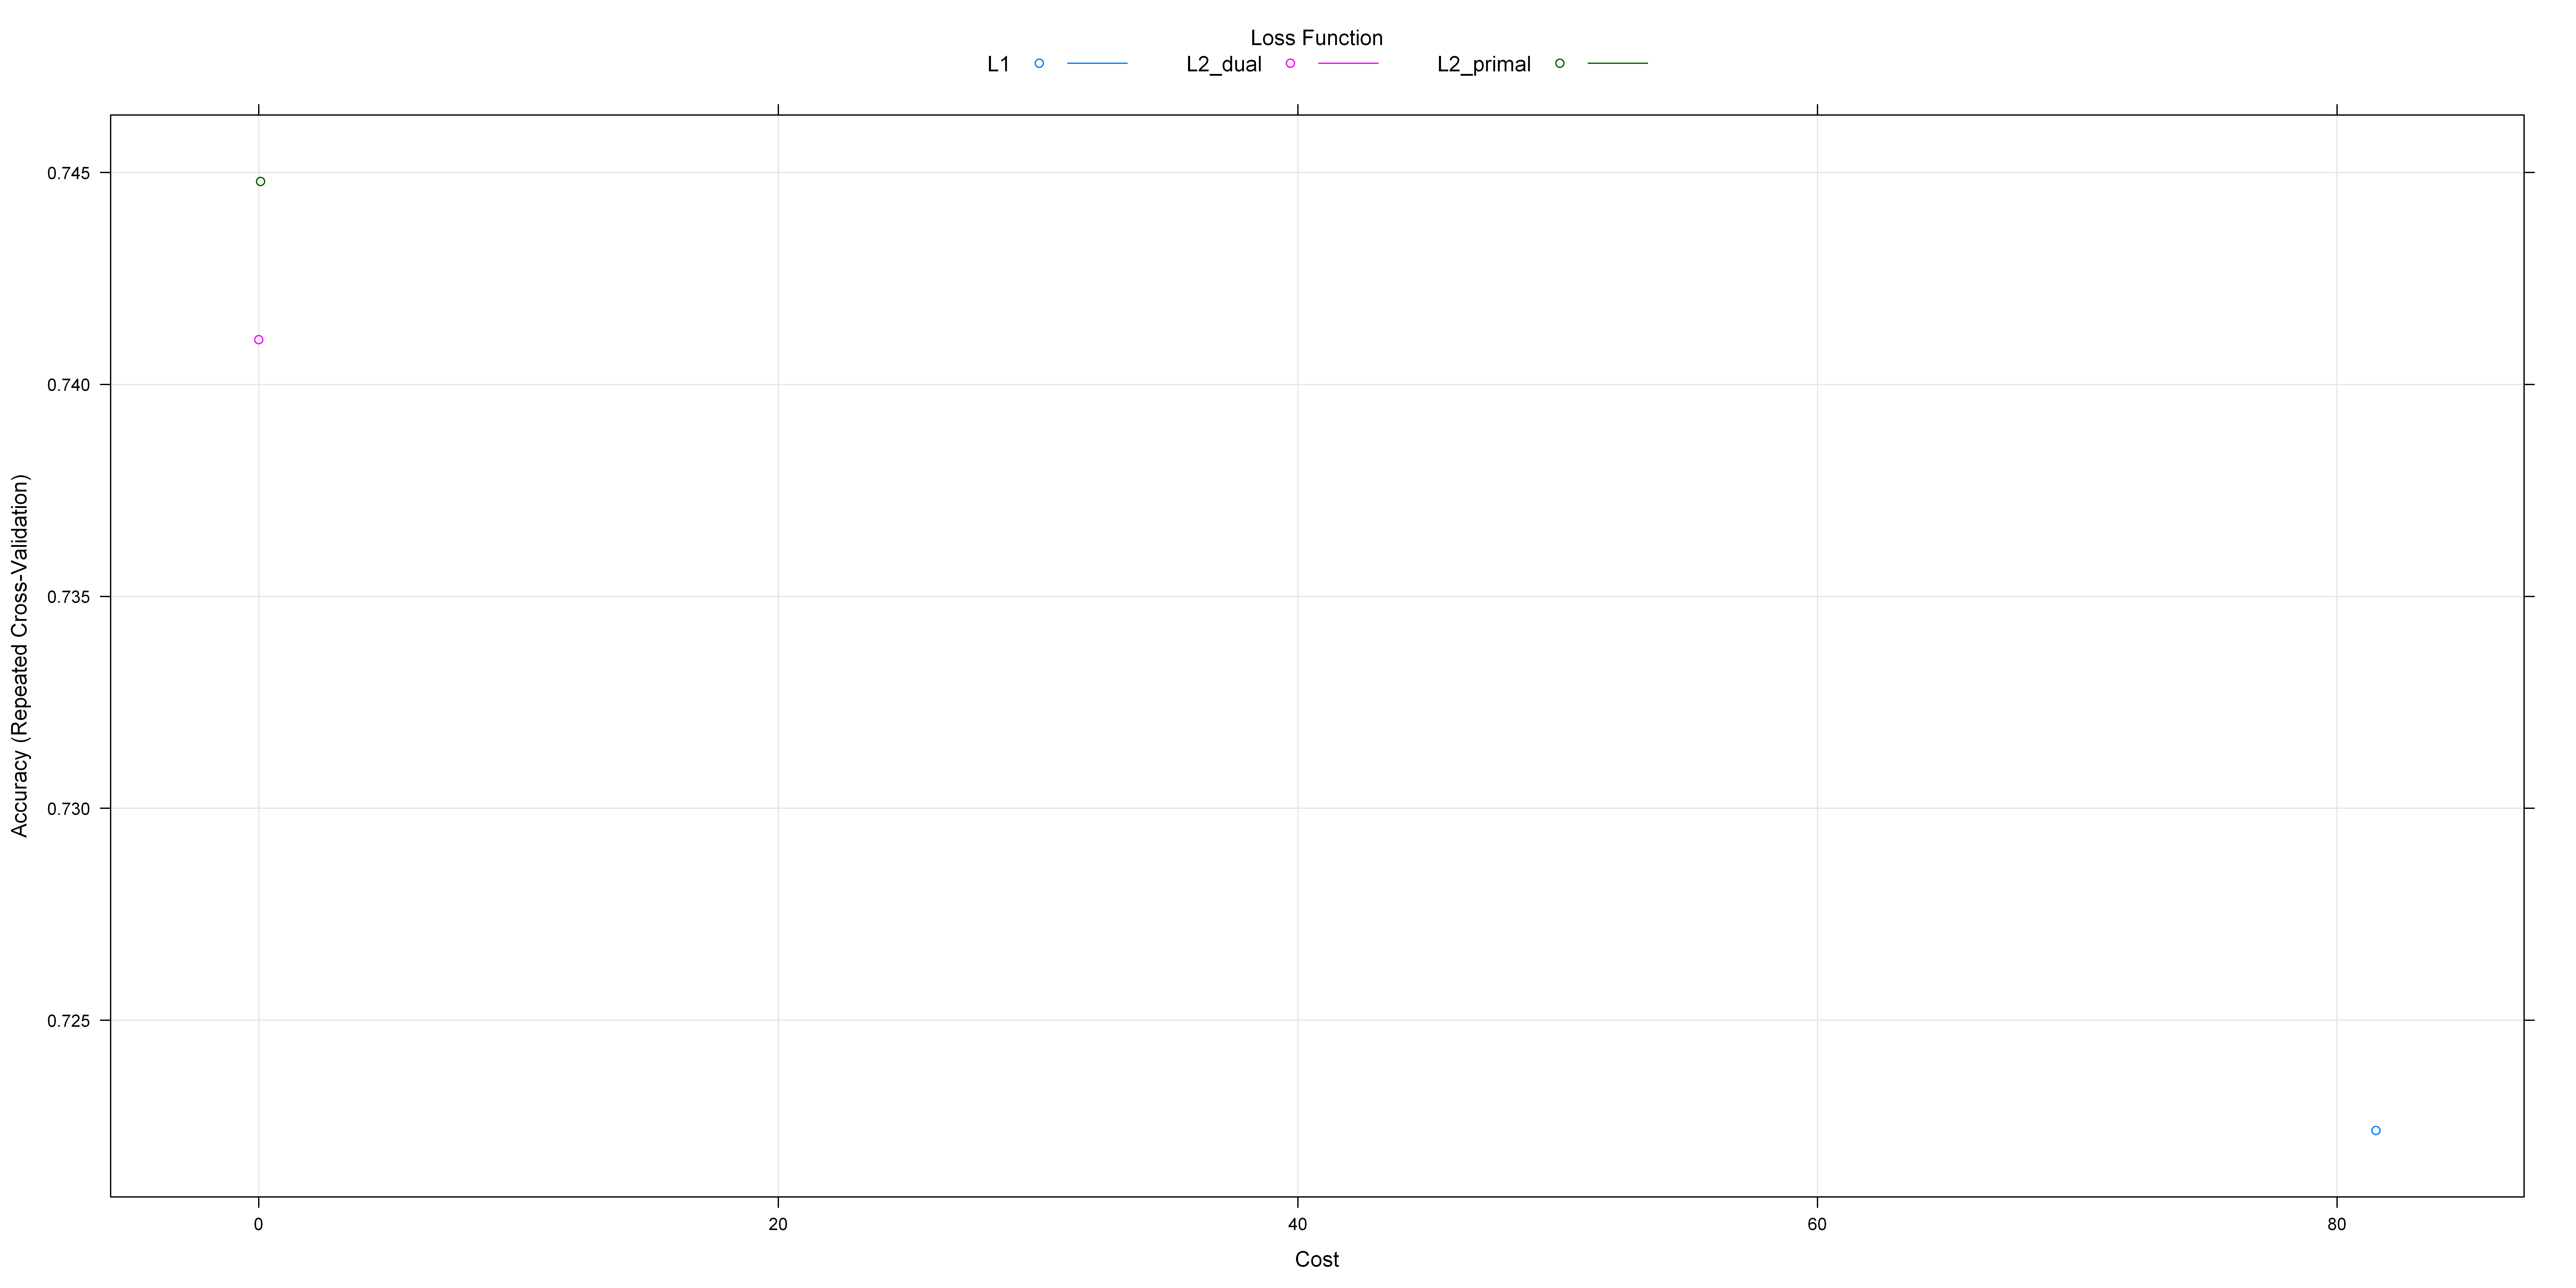

In [9]:
print(model_regLogistic)
plot(model_regLogistic)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.     Max. NA's
logitBoost  0.6984127 0.7190603 0.7338710 0.7525977 0.7670455 0.880597    0
regLogistic 0.6500000 0.7156250 0.7532012 0.7447915 0.7750000 0.825000    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.3957597 0.4342613 0.4662875 0.5025572 0.5269397 0.7613535    0
regLogistic 0.3000000 0.4312500 0.5064024 0.4896514 0.5500000 0.6500000    0


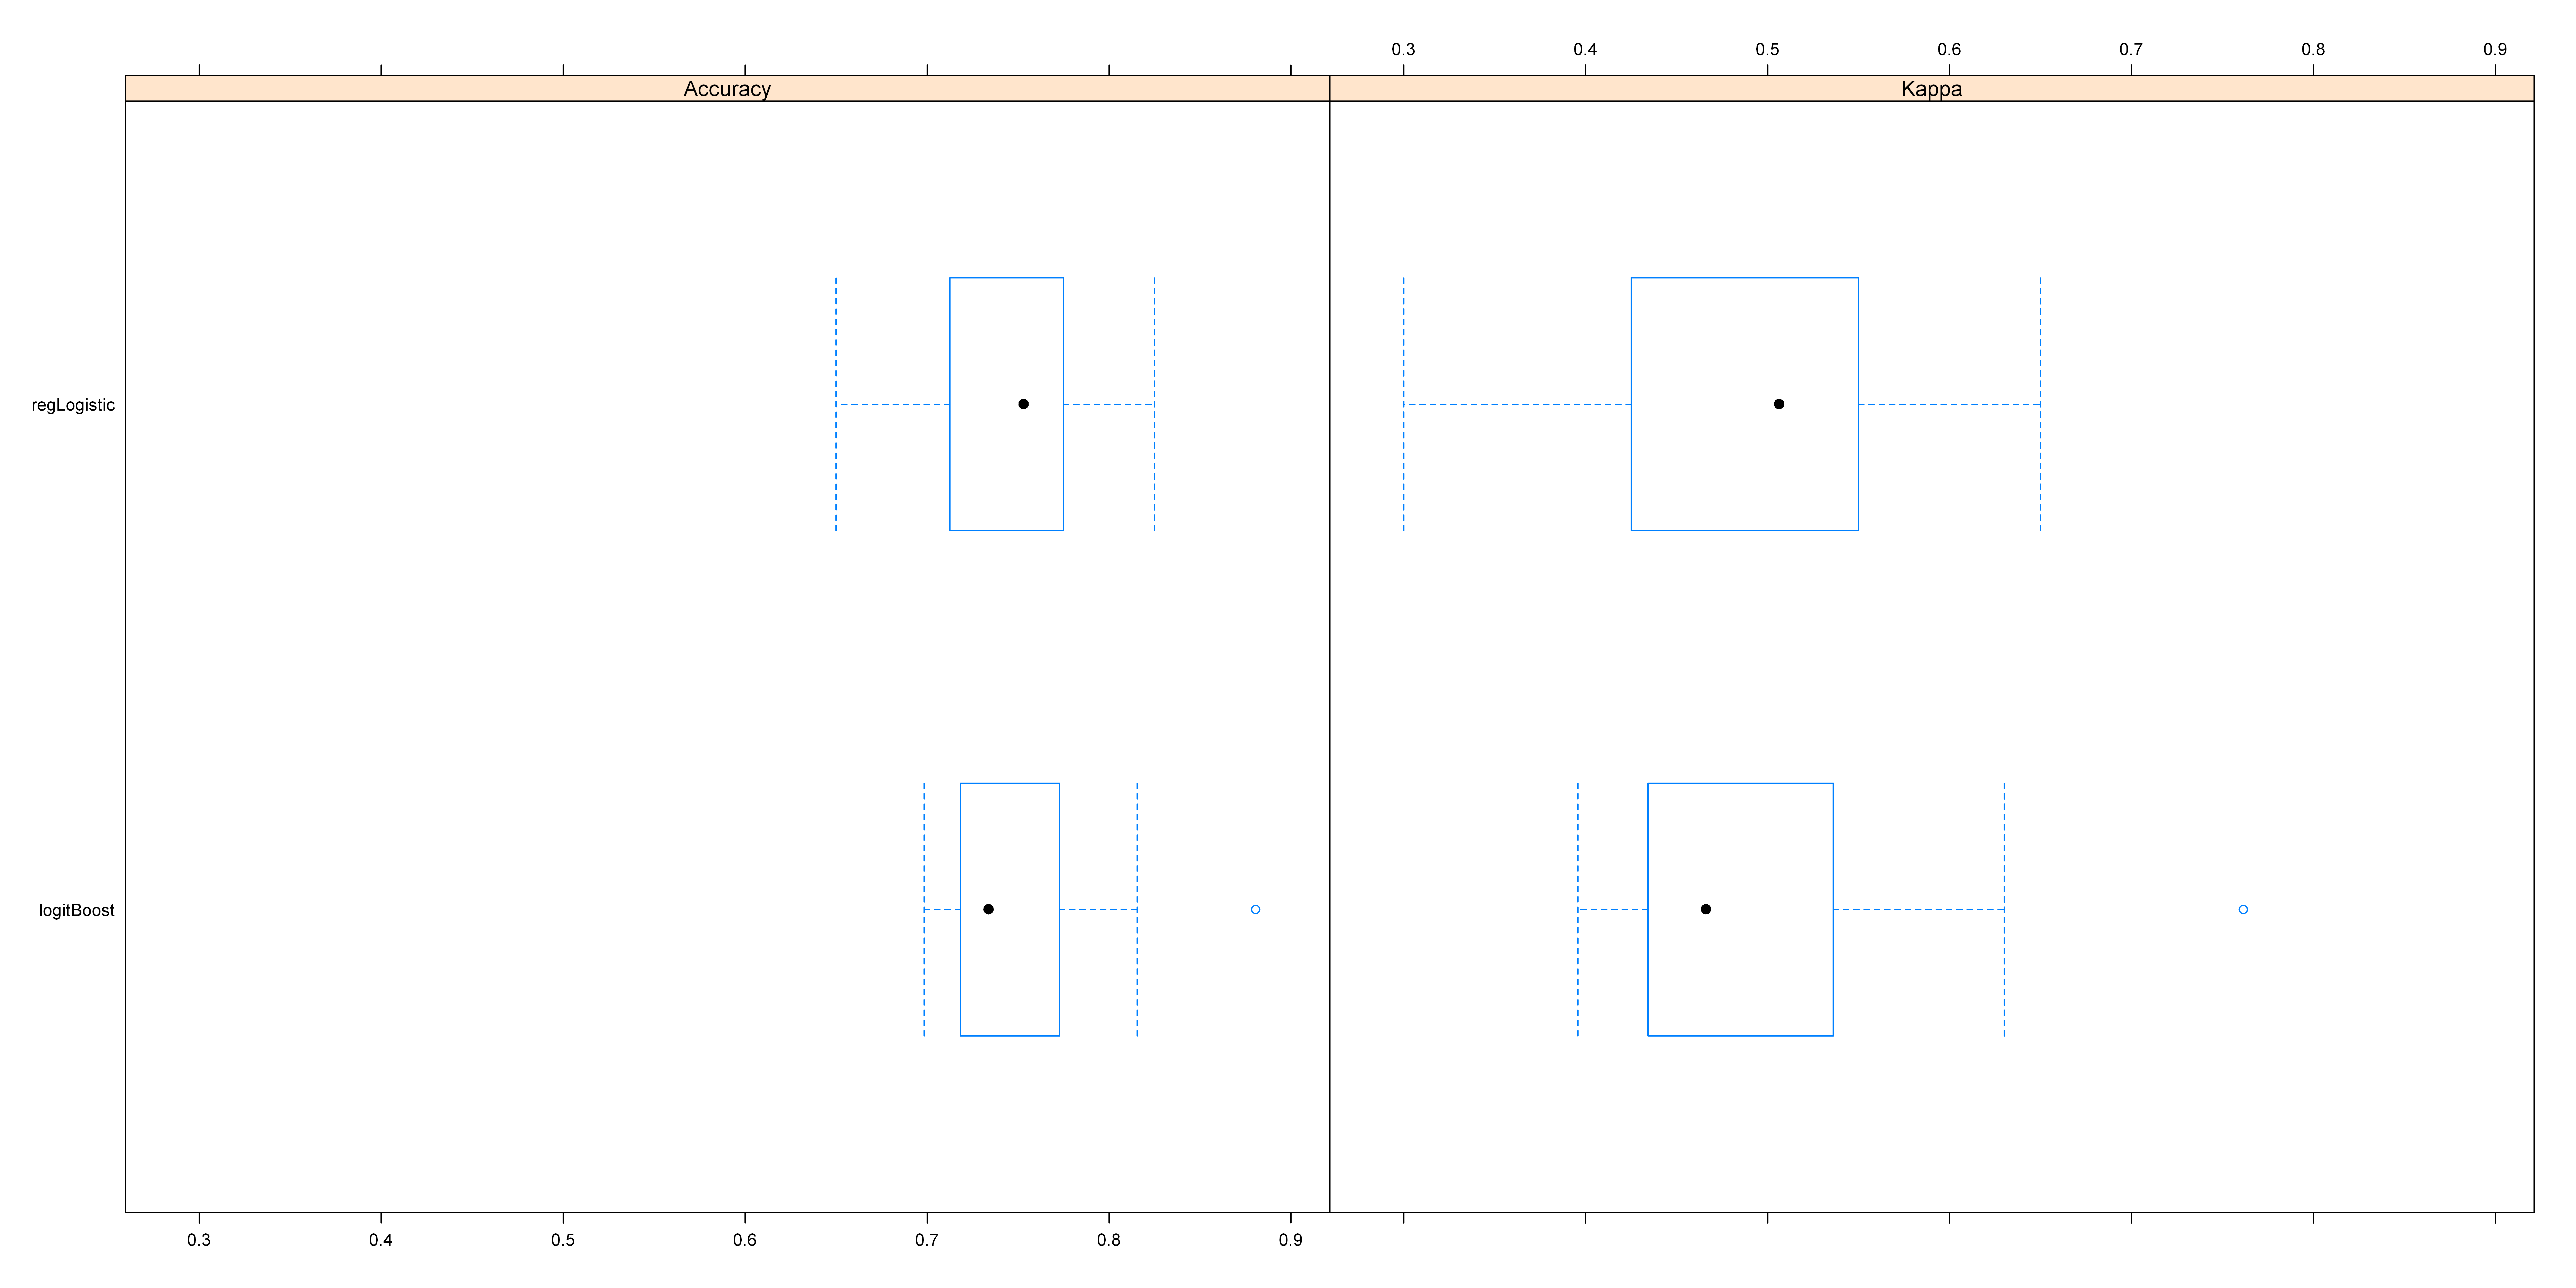

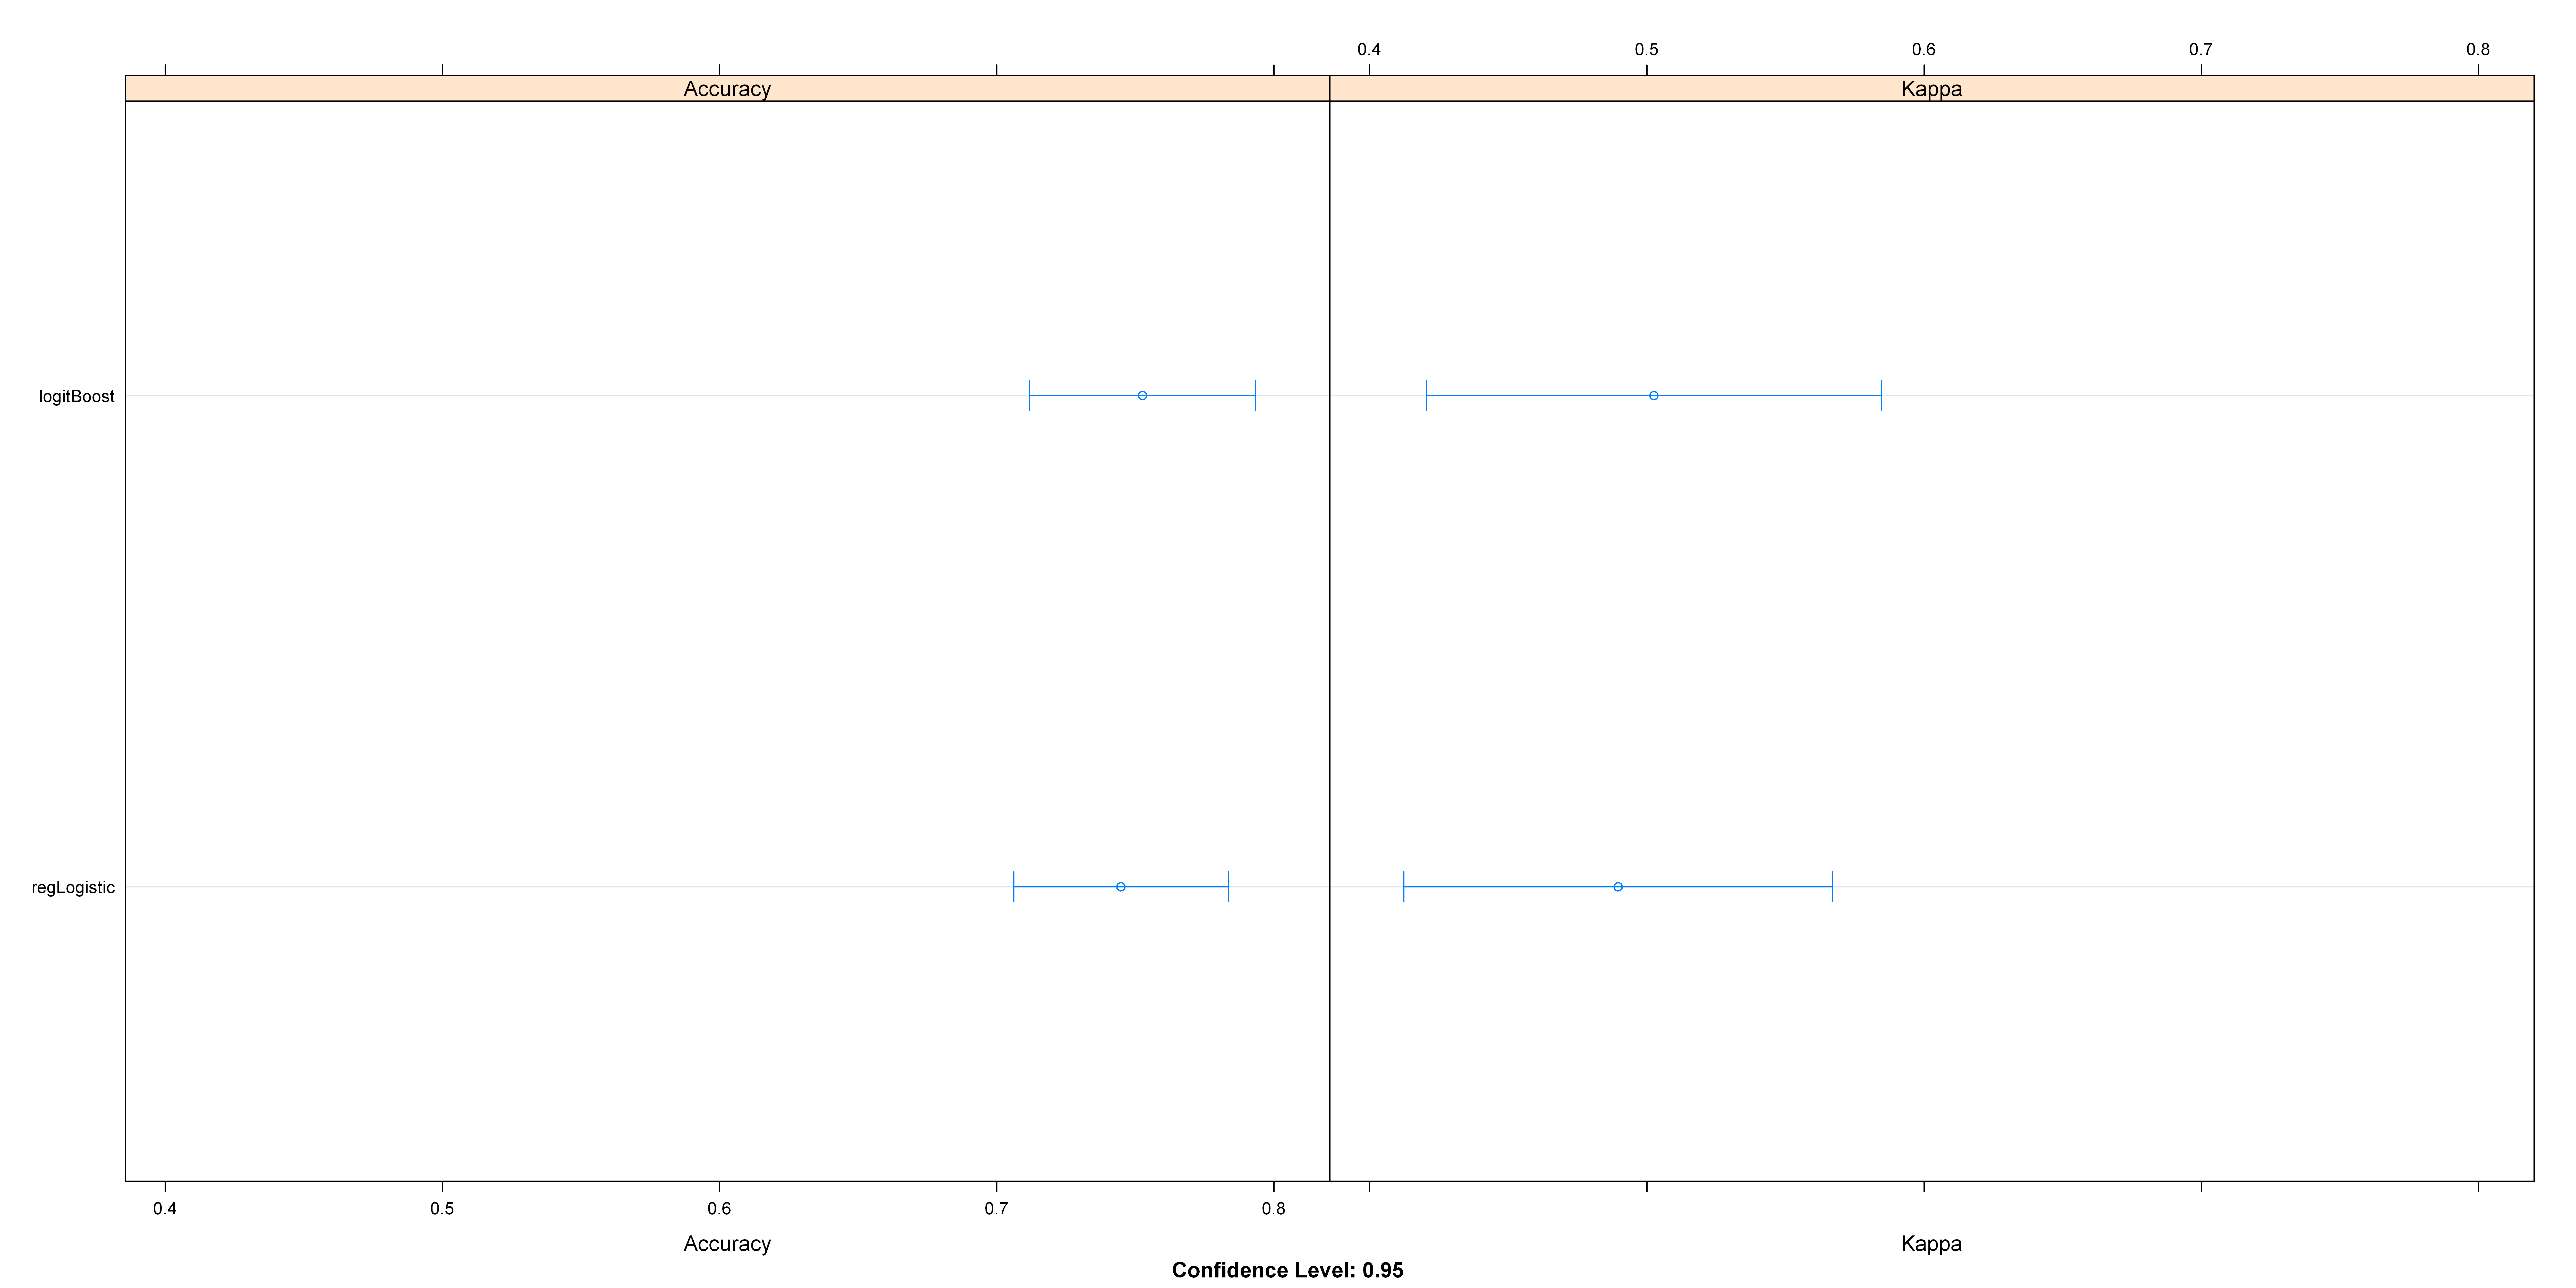

In [10]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [11]:
pred_logitBoost <- predict(model_logitBoost,test)   # 53 acc
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      64      34
   NotFast   53     132
                                          
               Accuracy : 0.6926          
                 95% CI : (0.6352, 0.7458)
    No Information Rate : 0.5866          
    P-Value [Acc > NIR] : 0.0001493       
                                          
                  Kappa : 0.3506          
                                          
 Mcnemar's Test P-Value : 0.0536313       
                                          
            Sensitivity : 0.5470          
            Specificity : 0.7952          
         Pos Pred Value : 0.6531          
         Neg Pred Value : 0.7135          
             Prevalence : 0.4134          
         Detection Rate : 0.2261          
   Detection Prevalence : 0.3463          
      Balanced Accuracy : 0.6711          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.5470085            0.7951807            0.6530612 
      Neg Pred Value            Precision               Recall 
           0.7135135            0.6530612            0.5470085 
                  F1           Prevalence       Detection Rate 
           0.5953488            0.4134276            0.2261484 
Detection Prevalence    Balanced Accuracy 
           0.3462898            0.6710946

direction: in which direction to make the comparison? “auto” (default for univariate curves): automatically define in which group the median is higher and take the direction accordingly. Not available for multivariate curves. “>” (default for multivariate curves): if the predictor values for the control group are higher than the values of the case group (controls > t >= cases). “<”: if the predictor values for the control group are lower or equal than the values of the case group (controls < t <= cases).

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



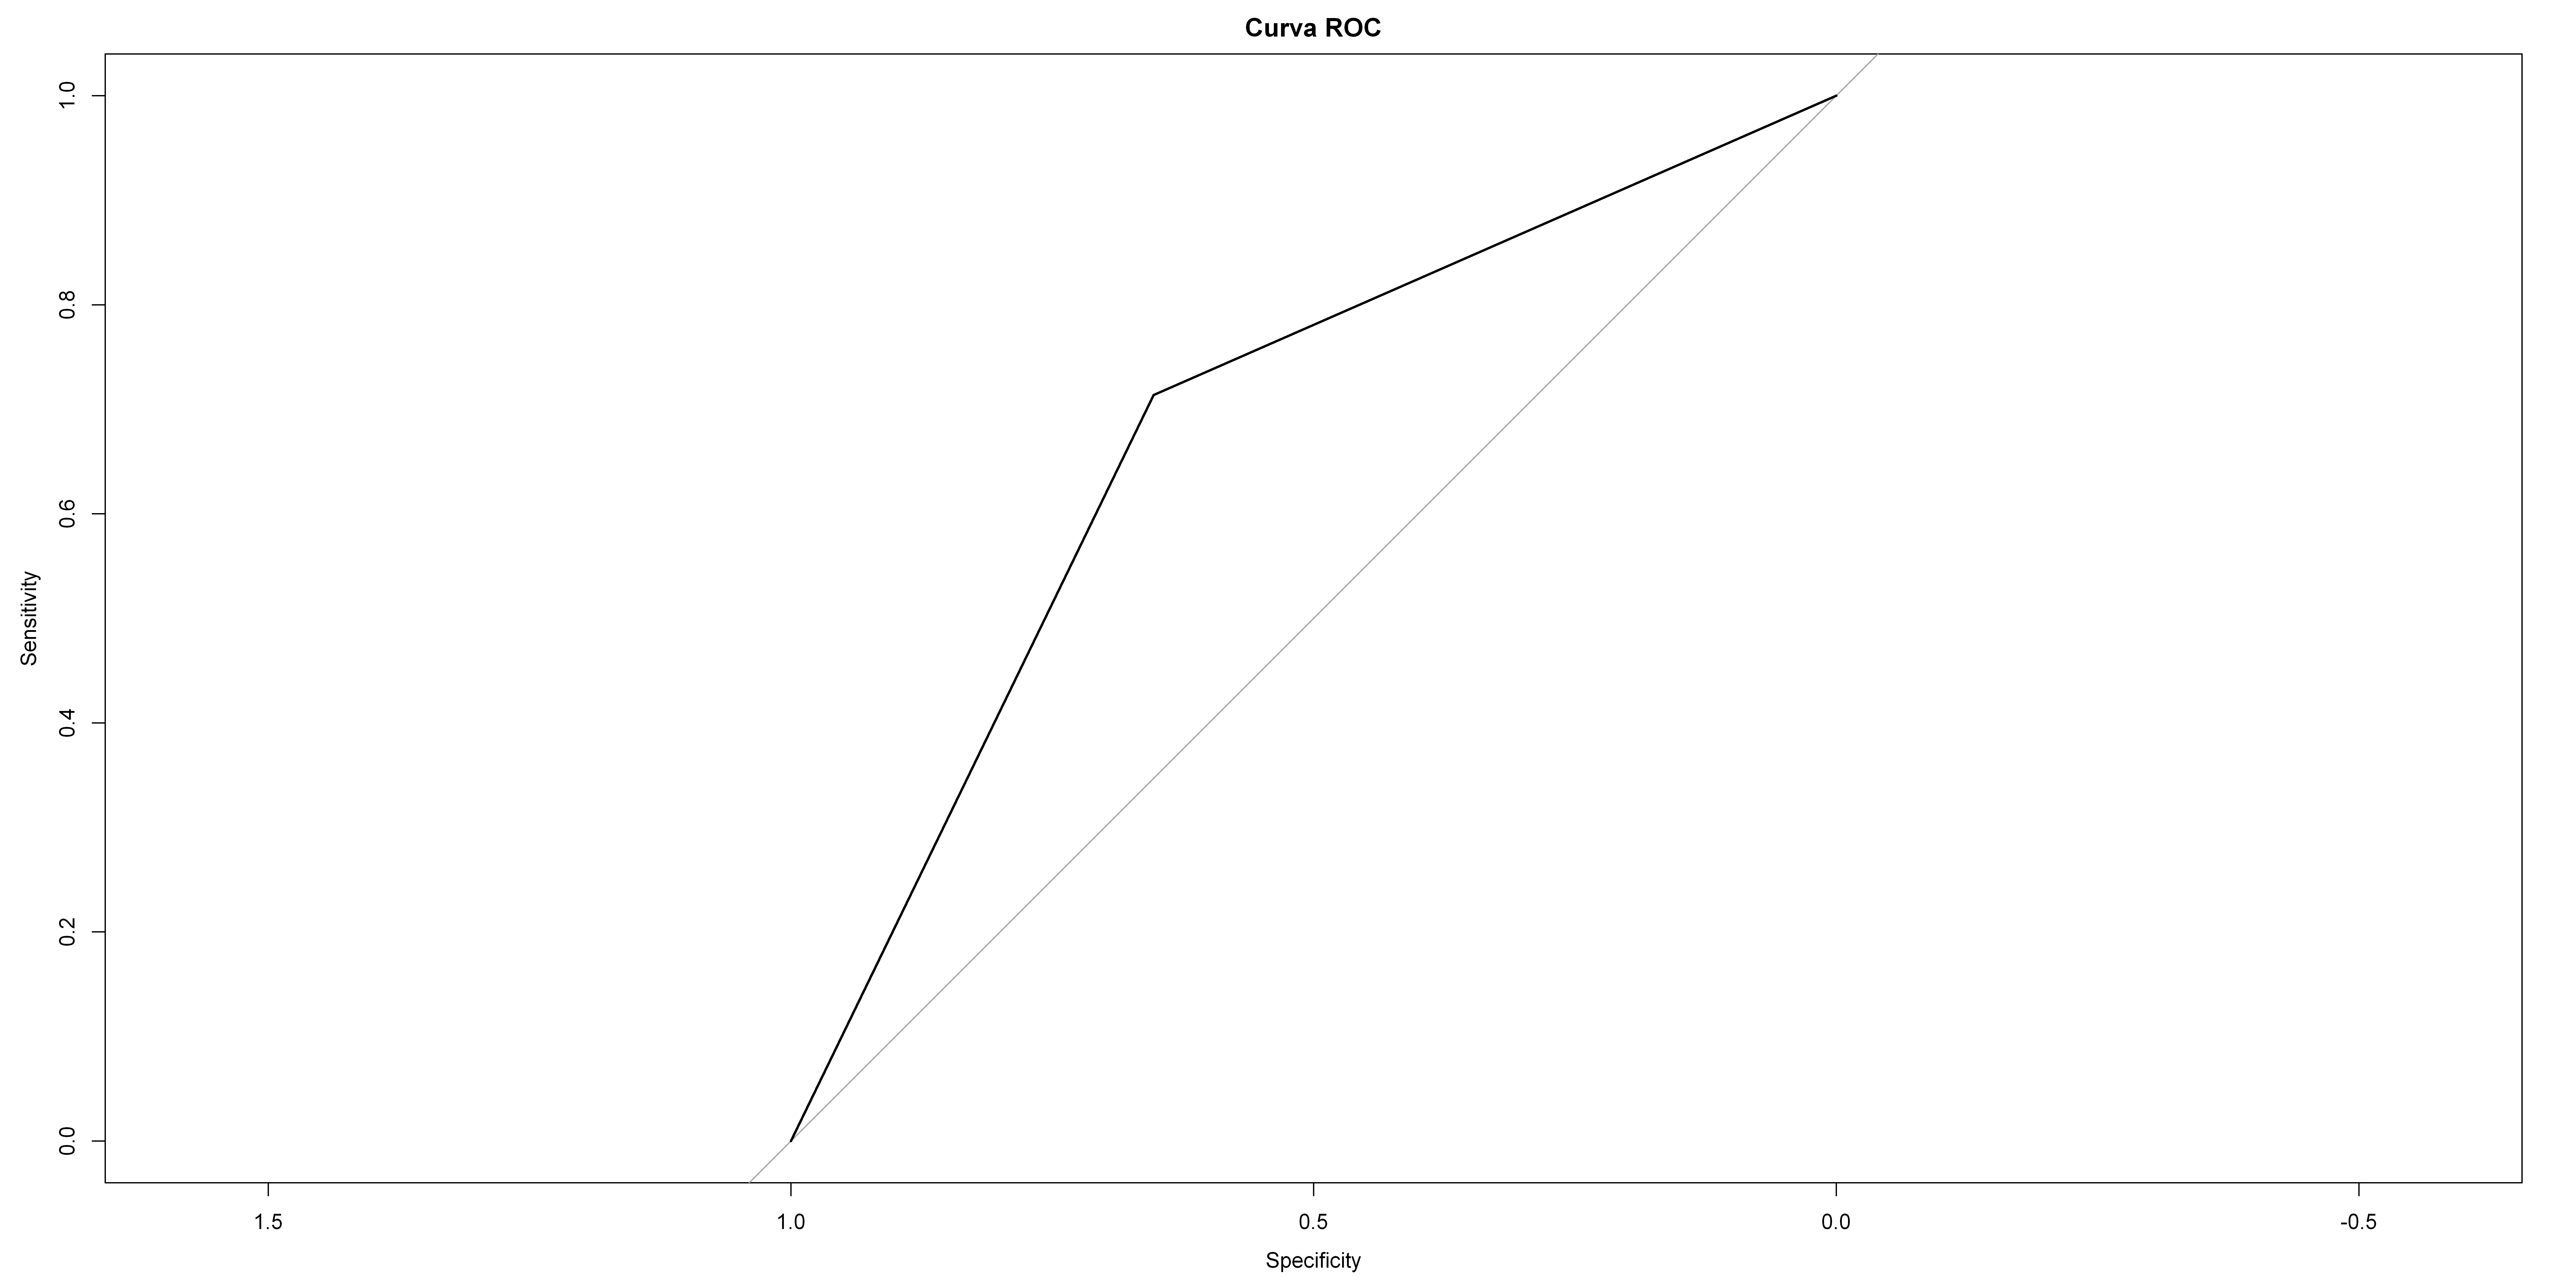

In [12]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [13]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 98 controls (TestClasses fast) < 185 cases (TestClasses NotFast).
Area under the curve: 0.6833

In [14]:
pred_logitBoost.prob

fast,NotFast
1.798621e-02,9.820138e-01
8.807971e-01,1.192029e-01
5.000000e-01,5.000000e-01
6.144175e-06,9.999939e-01
9.820138e-01,1.798621e-02
8.807971e-01,1.192029e-01
9.820138e-01,1.798621e-02
1.192029e-01,8.807971e-01
2.472623e-03,9.975274e-01
3.353501e-04,9.996646e-01


# Regressione logistica con variabili boruta

In [11]:
df_boruta <- subset(df, select=c(centreCode, degenzaPreTra, presentRefractAscites, nutritStatus, albumInfusOver7Days,
                                 ratioPaO2FiO2, platCountTranspl, albumina, surgeryDuration, IntraoperativTransfected,
                                 plasmaFresco, plasmaPools, CRIOprecipitated, CristalloidiComp, Albumina50Comp,
                                 noradrenalineEndSurger, intermedLactates, syndromeReperfus, abdomOpenEndSurg,
                                 organDonorDrawalSodiemia, realMELDNa, comorbidities_none_RIC, new_admWard, EPScum,deg_cat))

In [12]:



sample <- sample.split(df_boruta$deg_cat, SplitRatio = 0.7)
train  <- subset(df_boruta, sample == TRUE)
test   <- subset(df_boruta, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [13]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    401     402 

In [14]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [15]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)  

+ Fold01.Rep1: cost= 0.004720, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost= 0.004720, loss=L2_dual, epsilon=1 
+ Fold01.Rep1: cost=58.392818, loss=L1, epsilon=1 
- Fold01.Rep1: cost=58.392818, loss=L1, epsilon=1 
+ Fold01.Rep1: cost= 0.001037, loss=L2_primal, epsilon=1 
- Fold01.Rep1: cost= 0.001037, loss=L2_primal, epsilon=1 
+ Fold02.Rep1: cost= 0.004720, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost= 0.004720, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost=58.392818, loss=L1, epsilon=1 
- Fold02.Rep1: cost=58.392818, loss=L1, epsilon=1 
+ Fold02.Rep1: cost= 0.001037, loss=L2_primal, epsilon=1 
- Fold02.Rep1: cost= 0.001037, loss=L2_primal, epsilon=1 
+ Fold03.Rep1: cost= 0.004720, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost= 0.004720, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost=58.392818, loss=L1, epsilon=1 
- Fold03.Rep1: cost=58.392818, loss=L1, epsilon=1 
+ Fold03.Rep1: cost= 0.001037, loss=L2_primal, epsilon=1 
- Fold03.Rep1: cost= 0.001037, loss=L2_primal, epsilon=1 
+ Fold04.R

In [16]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 


+ Fold01.Rep1: nIter=77 
- Fold01.Rep1: nIter=77 
+ Fold02.Rep1: nIter=77 
- Fold02.Rep1: nIter=77 
+ Fold03.Rep1: nIter=77 
- Fold03.Rep1: nIter=77 
+ Fold04.Rep1: nIter=77 
- Fold04.Rep1: nIter=77 
+ Fold05.Rep1: nIter=77 
- Fold05.Rep1: nIter=77 
+ Fold06.Rep1: nIter=77 
- Fold06.Rep1: nIter=77 
+ Fold07.Rep1: nIter=77 
- Fold07.Rep1: nIter=77 
+ Fold08.Rep1: nIter=77 
- Fold08.Rep1: nIter=77 
+ Fold09.Rep1: nIter=77 
- Fold09.Rep1: nIter=77 
+ Fold10.Rep1: nIter=77 
- Fold10.Rep1: nIter=77 
Aggregating results
Selecting tuning parameters
Fitting nIter = 58 on full training set


Regularized Logistic Regression 

803 samples
 24 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 723, 723, 723, 723, 723, 722, ... 
Resampling results across tuning parameters:

  cost          loss       Accuracy   Kappa    
   0.001036802  L2_primal  0.7422377  0.4846433
   0.004720105  L2_dual    0.7571605  0.5144167
  58.392818365  L1         0.7321605  0.4643927

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 0.004720105, loss = L2_dual
 and epsilon = 1.


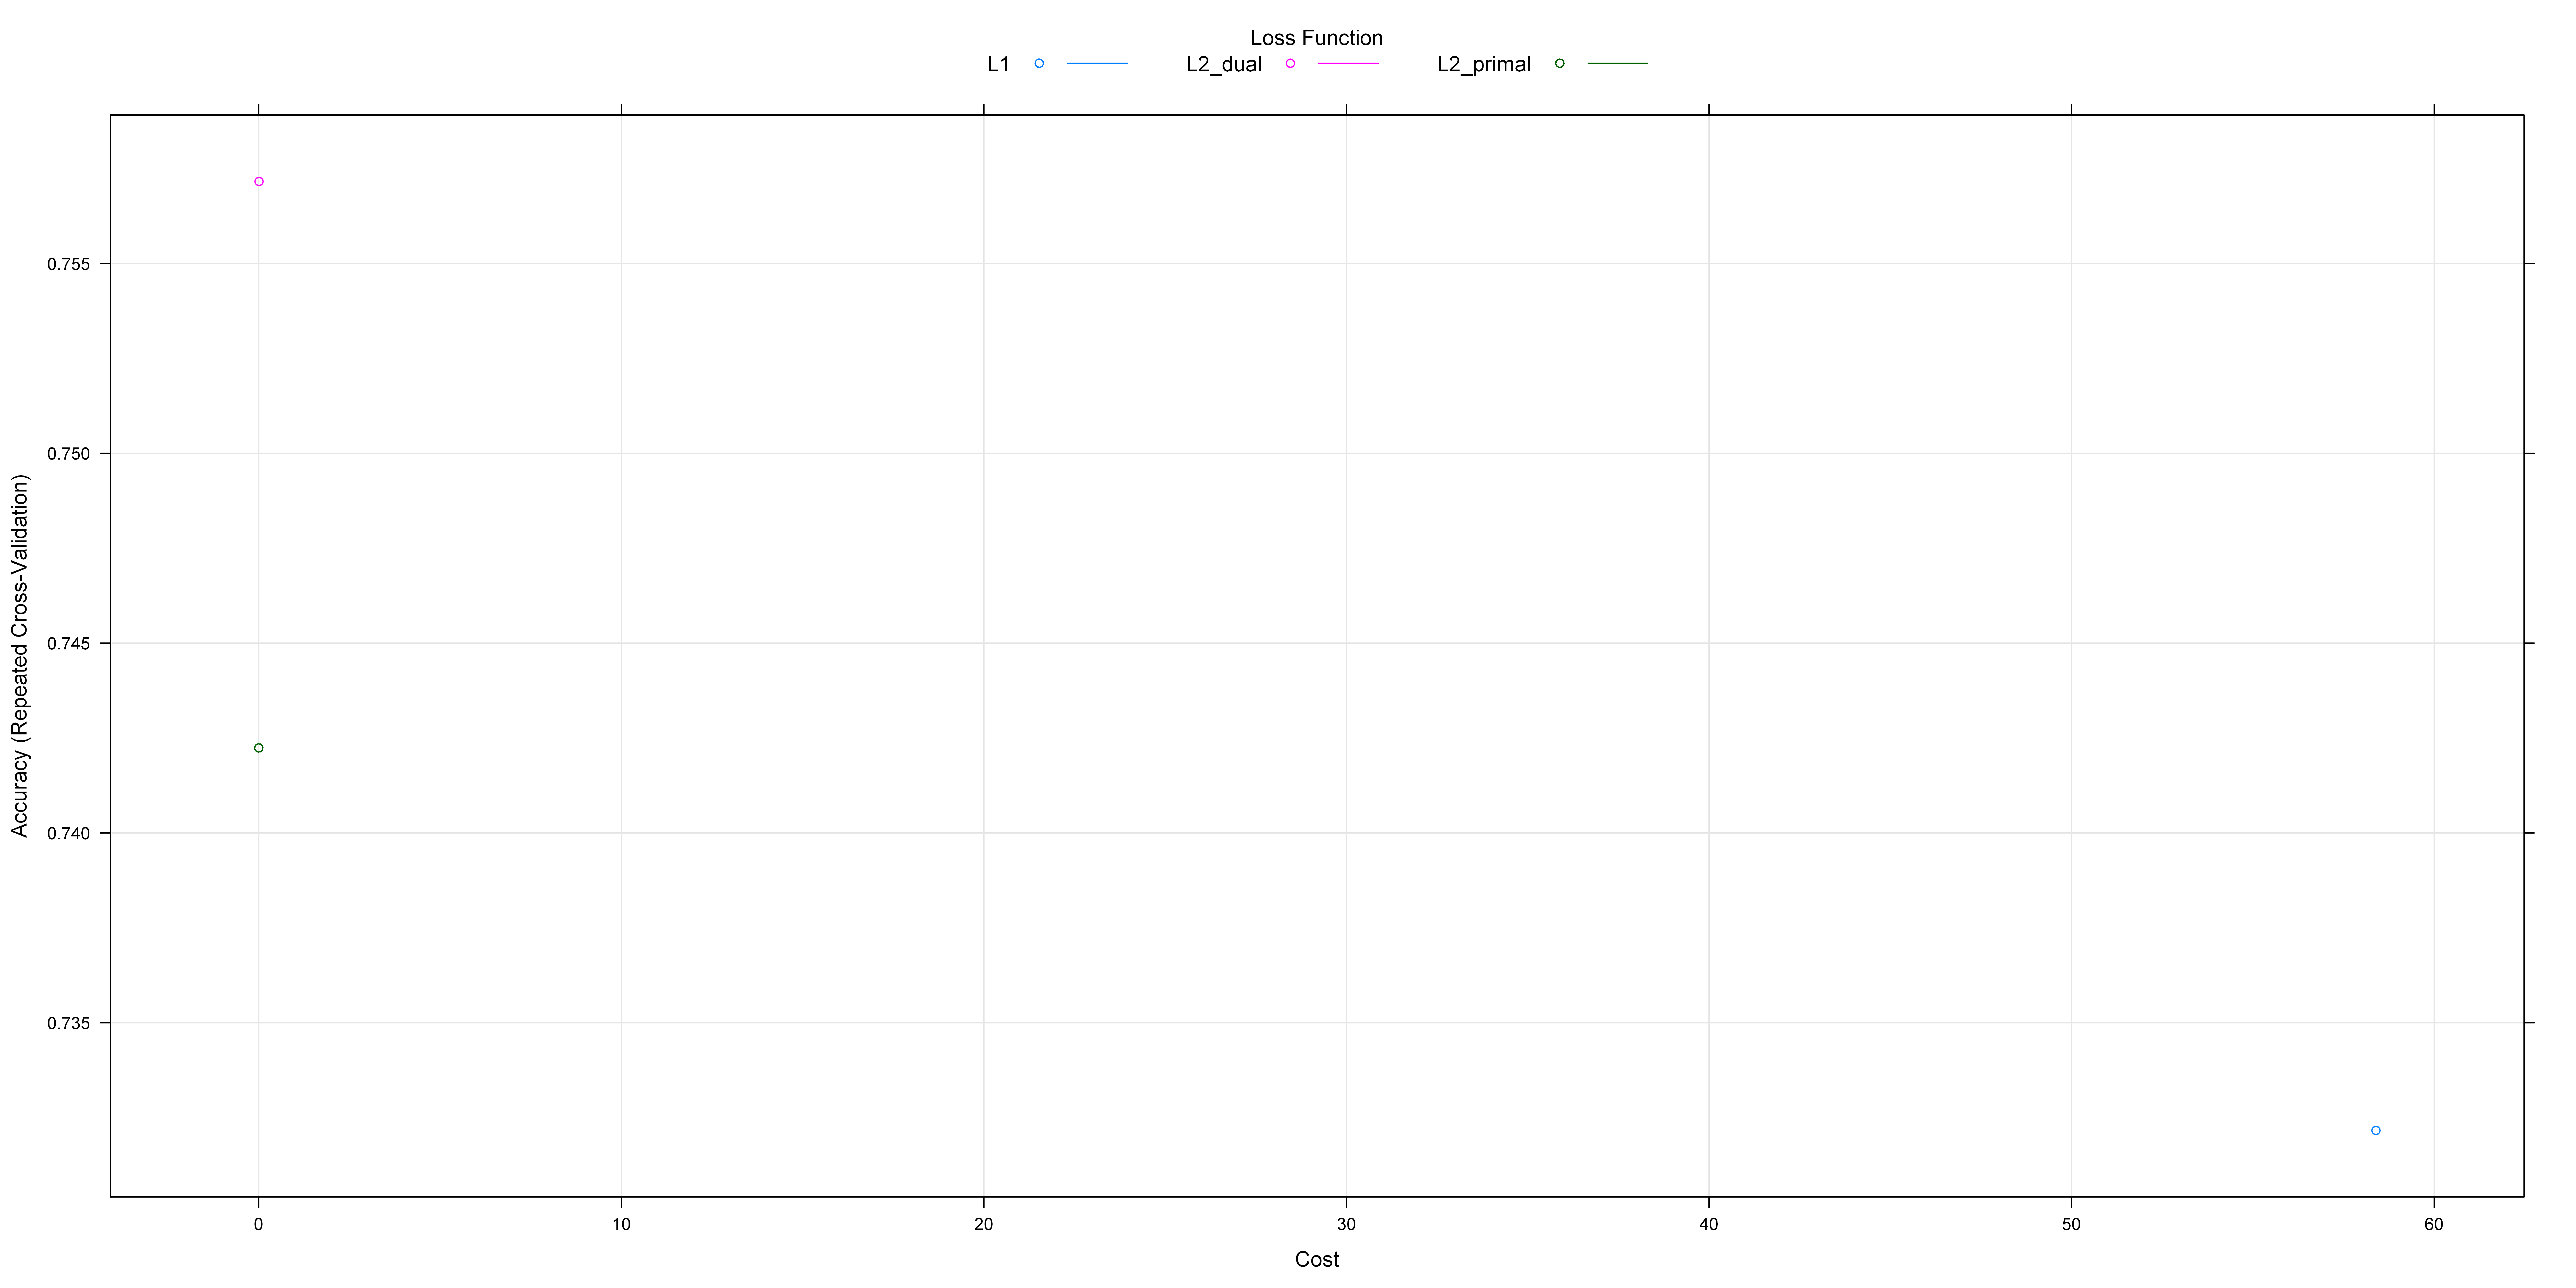

In [17]:
print(model_regLogistic)
plot(model_regLogistic)

Boosted Logistic Regression 

803 samples
 24 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 722, 723, 723, 722, 723, 723, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  47     0.7260648  0.4519973
  58     0.7605715  0.5163740
  77     0.7422222  0.4843641

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 58.


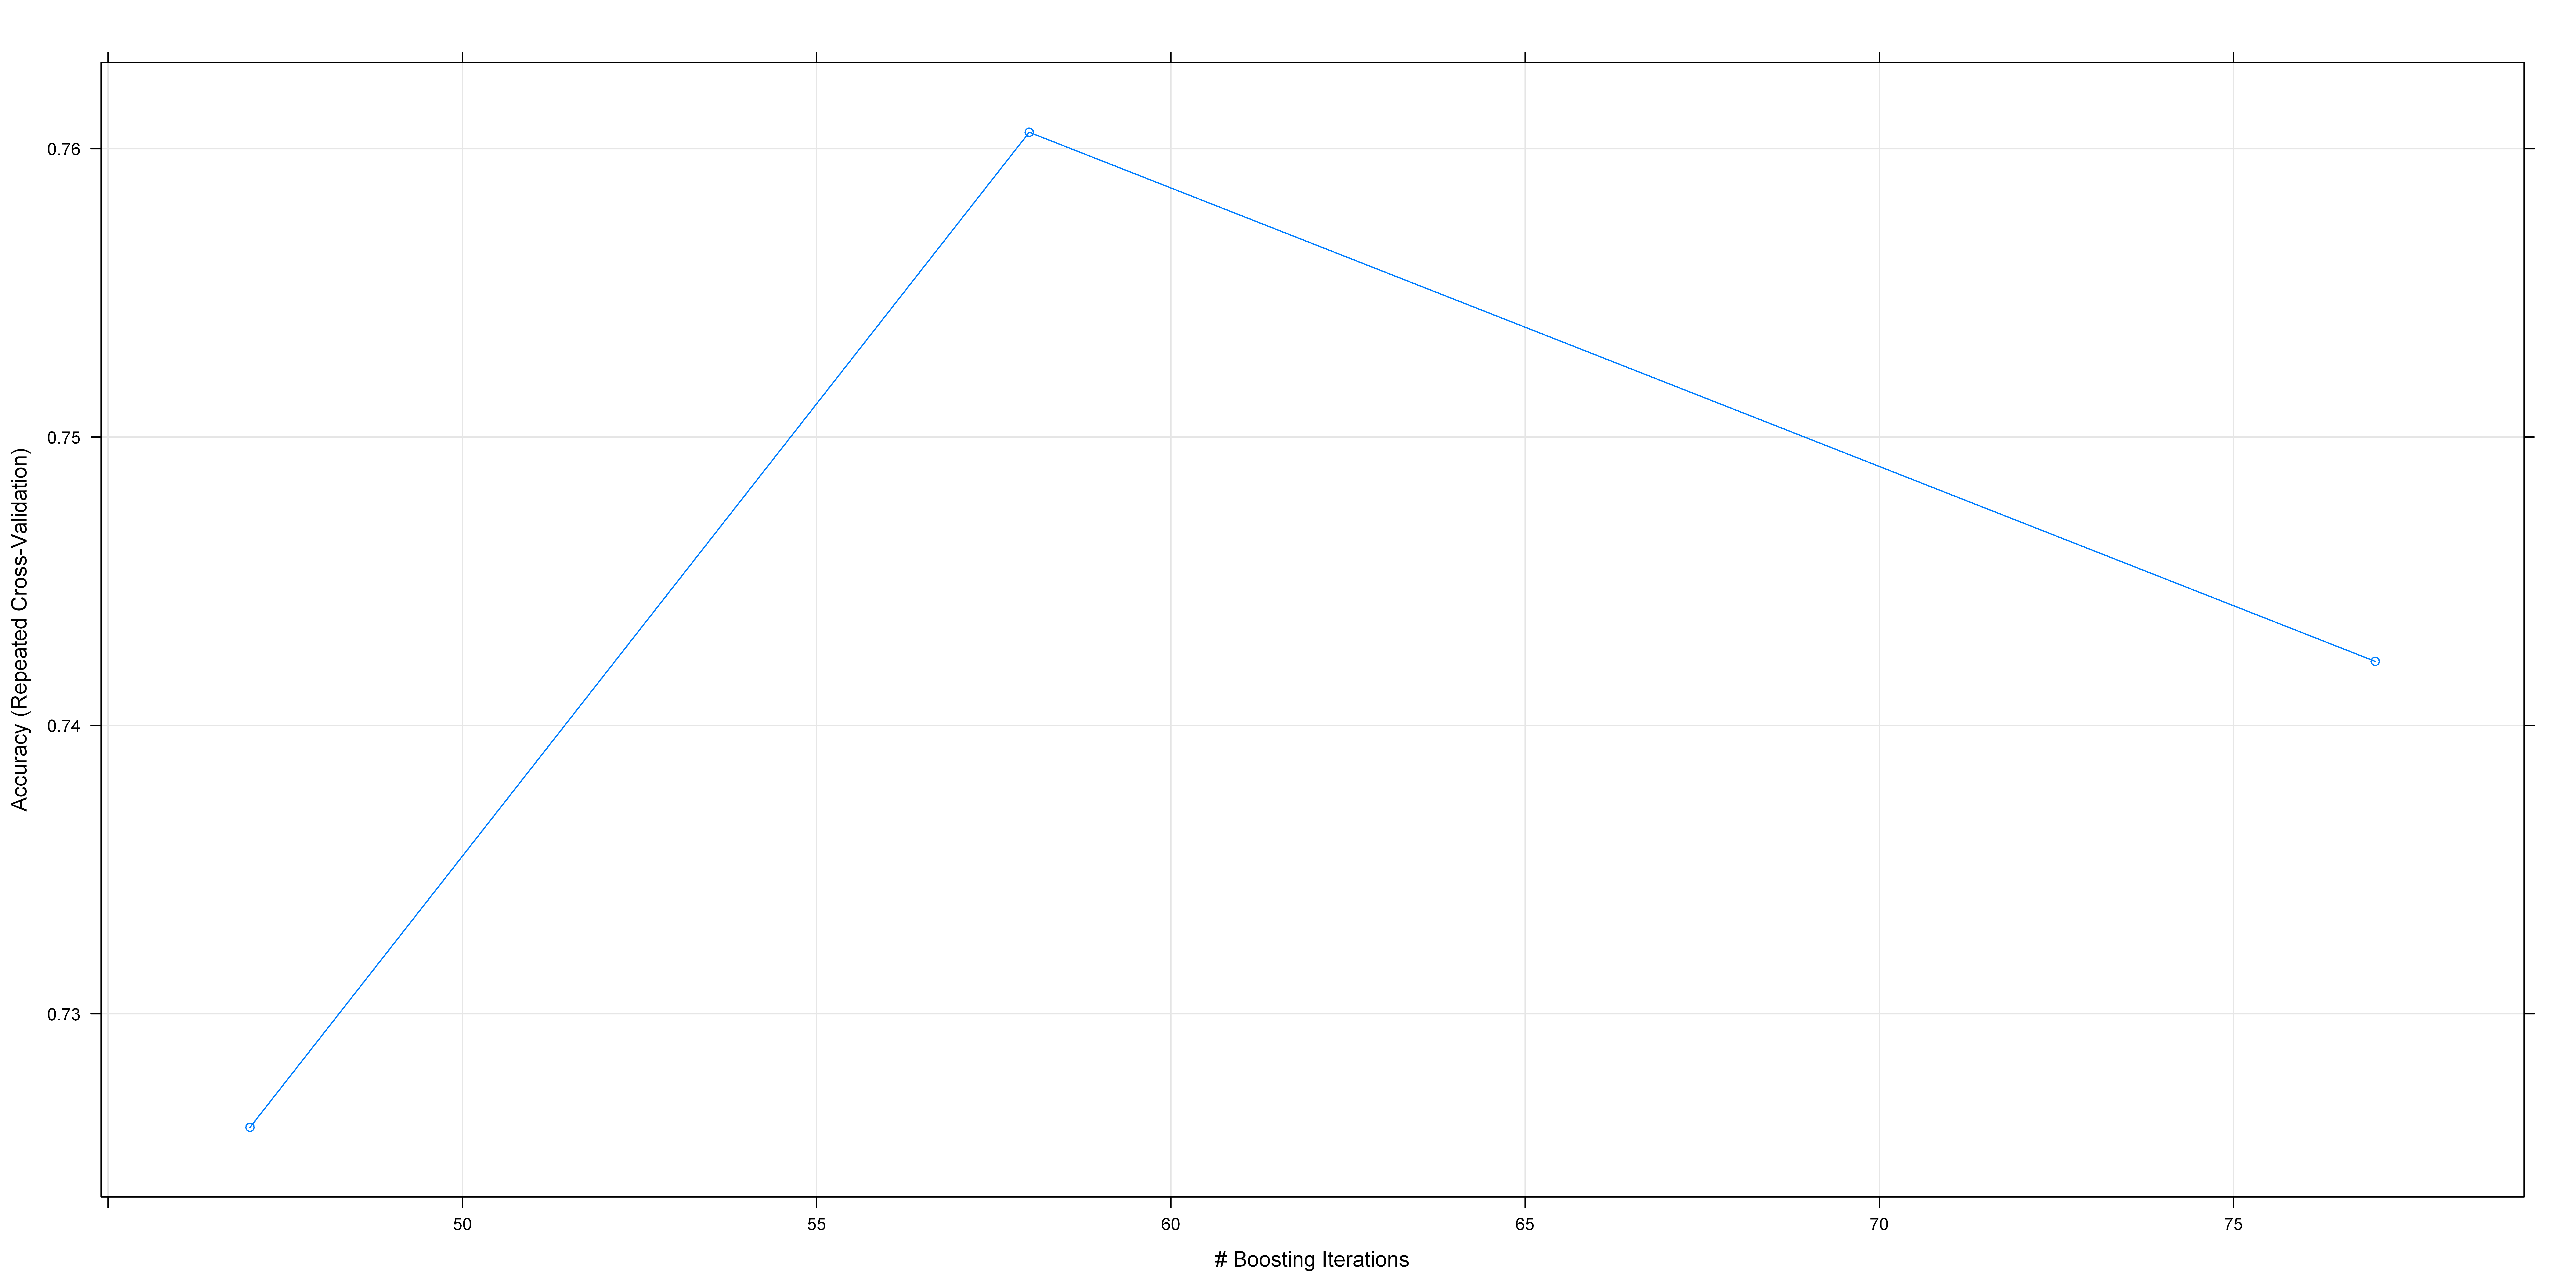

In [18]:
print(model_logitBoost)
plot(model_logitBoost)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.  1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.6857143 0.720339 0.7594021 0.7605715 0.8039063 0.8307692    0
regLogistic 0.6913580 0.737500 0.7516204 0.7571605 0.7718750 0.8395062    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.3714286 0.4325906 0.5145345 0.5163740 0.6078596 0.6609195    0
regLogistic 0.3839367 0.4750000 0.5032802 0.5144167 0.5437500 0.6786695    0


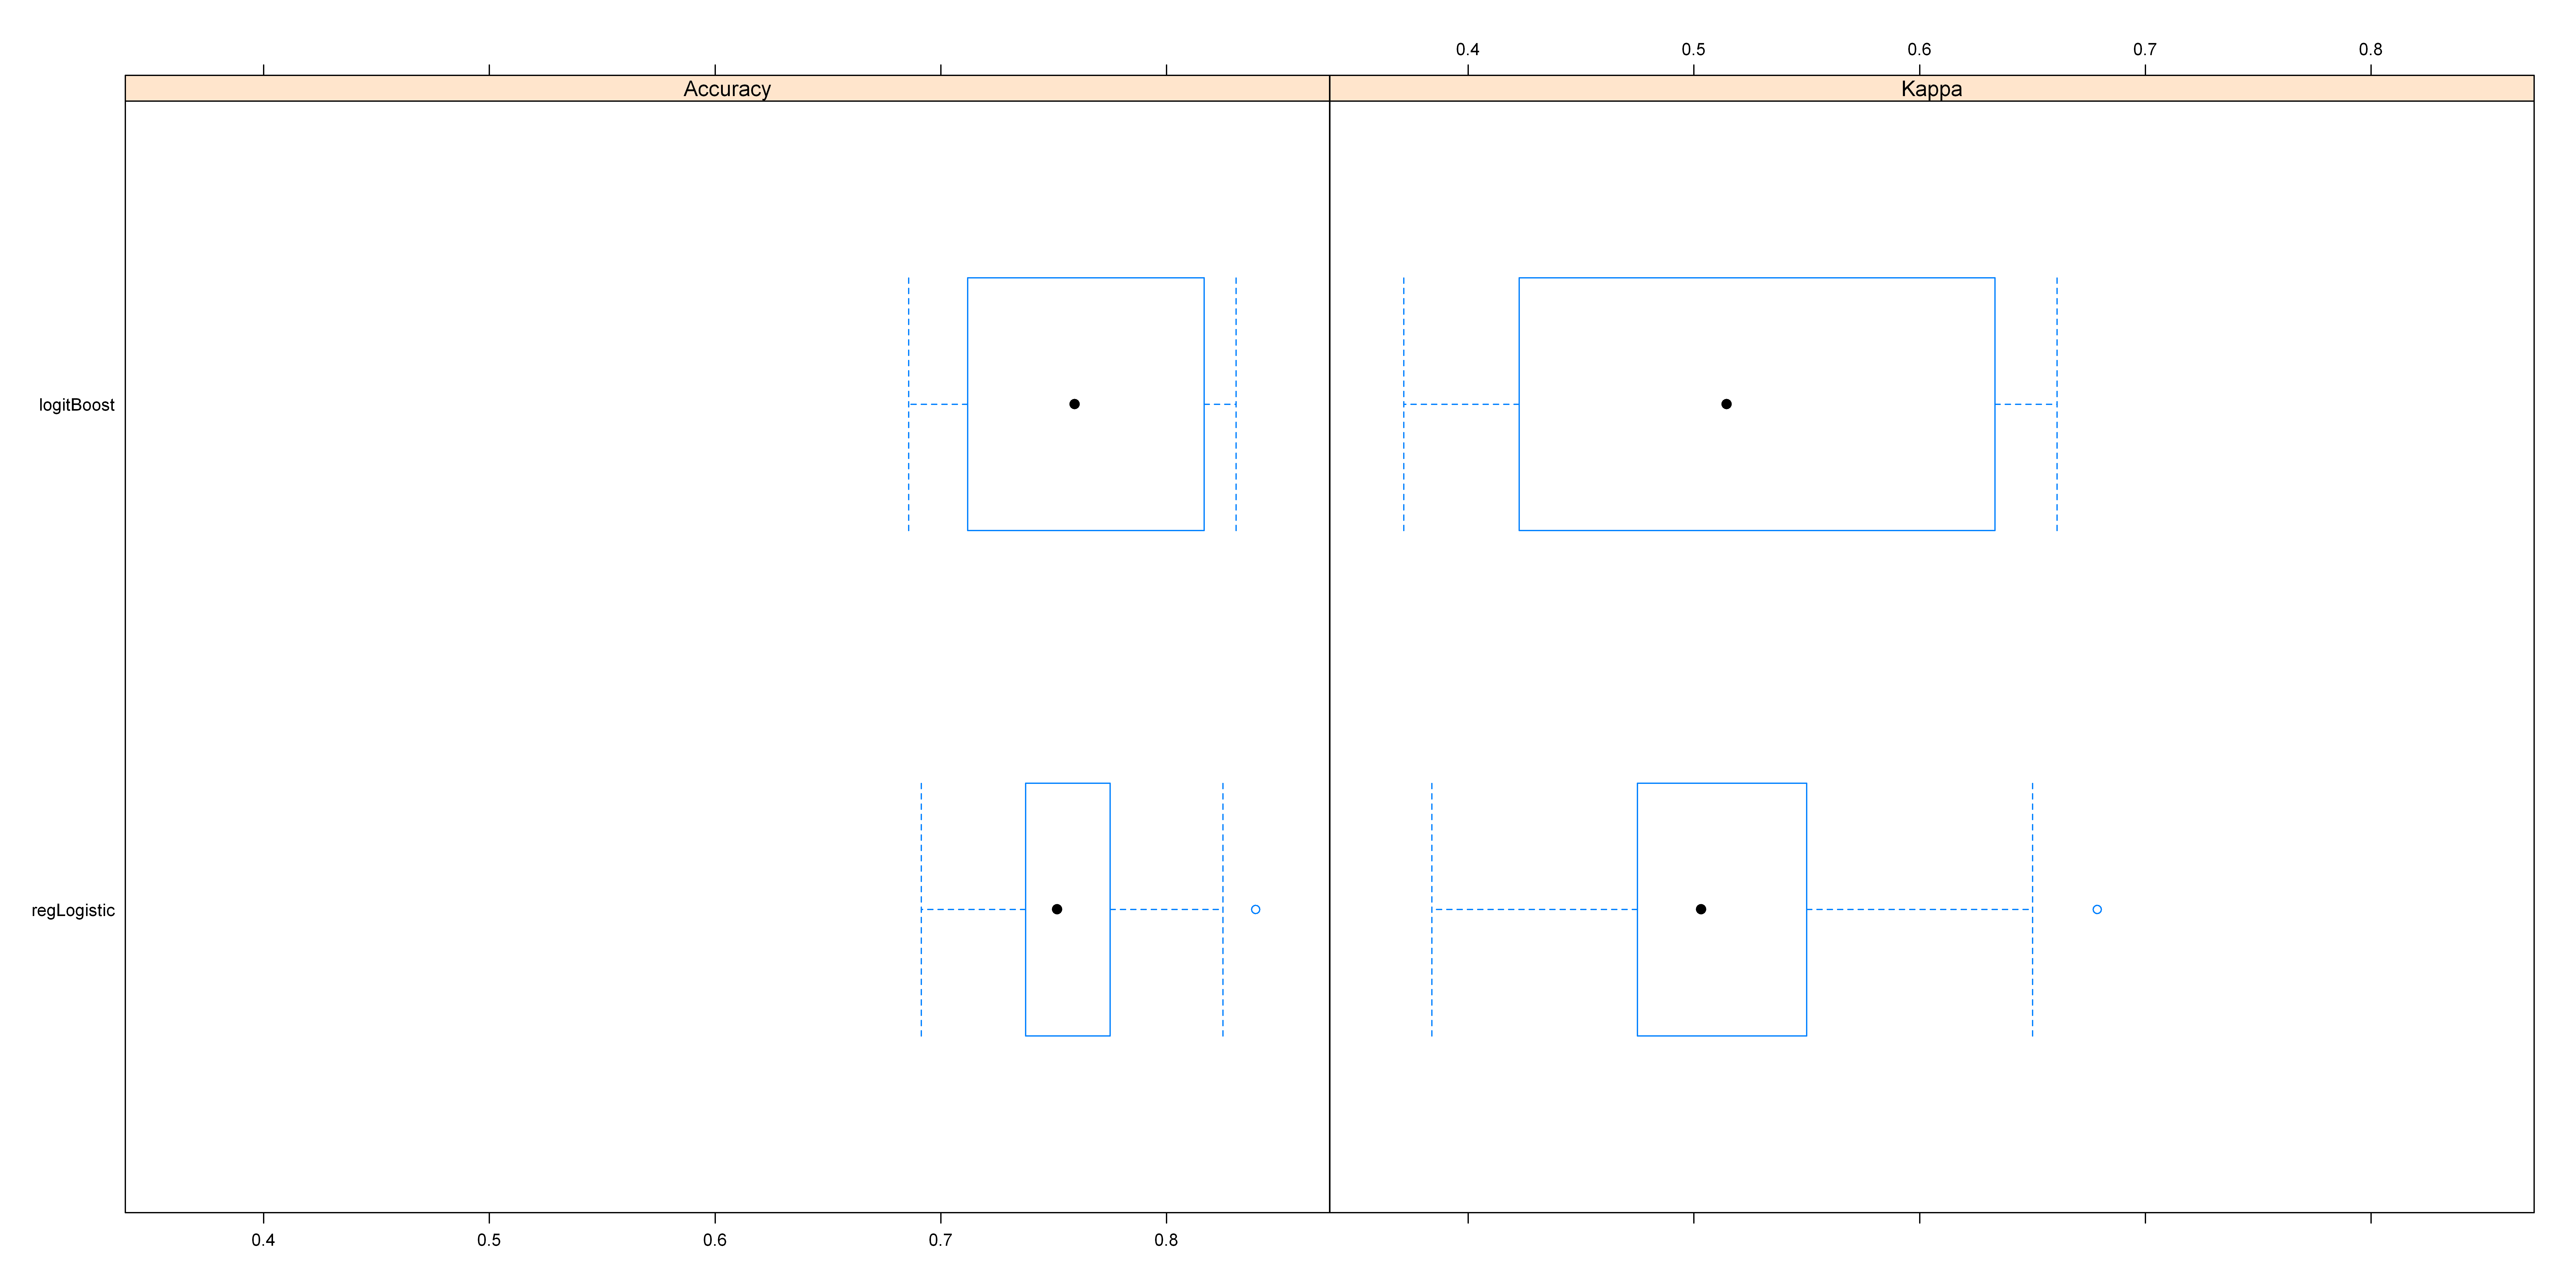

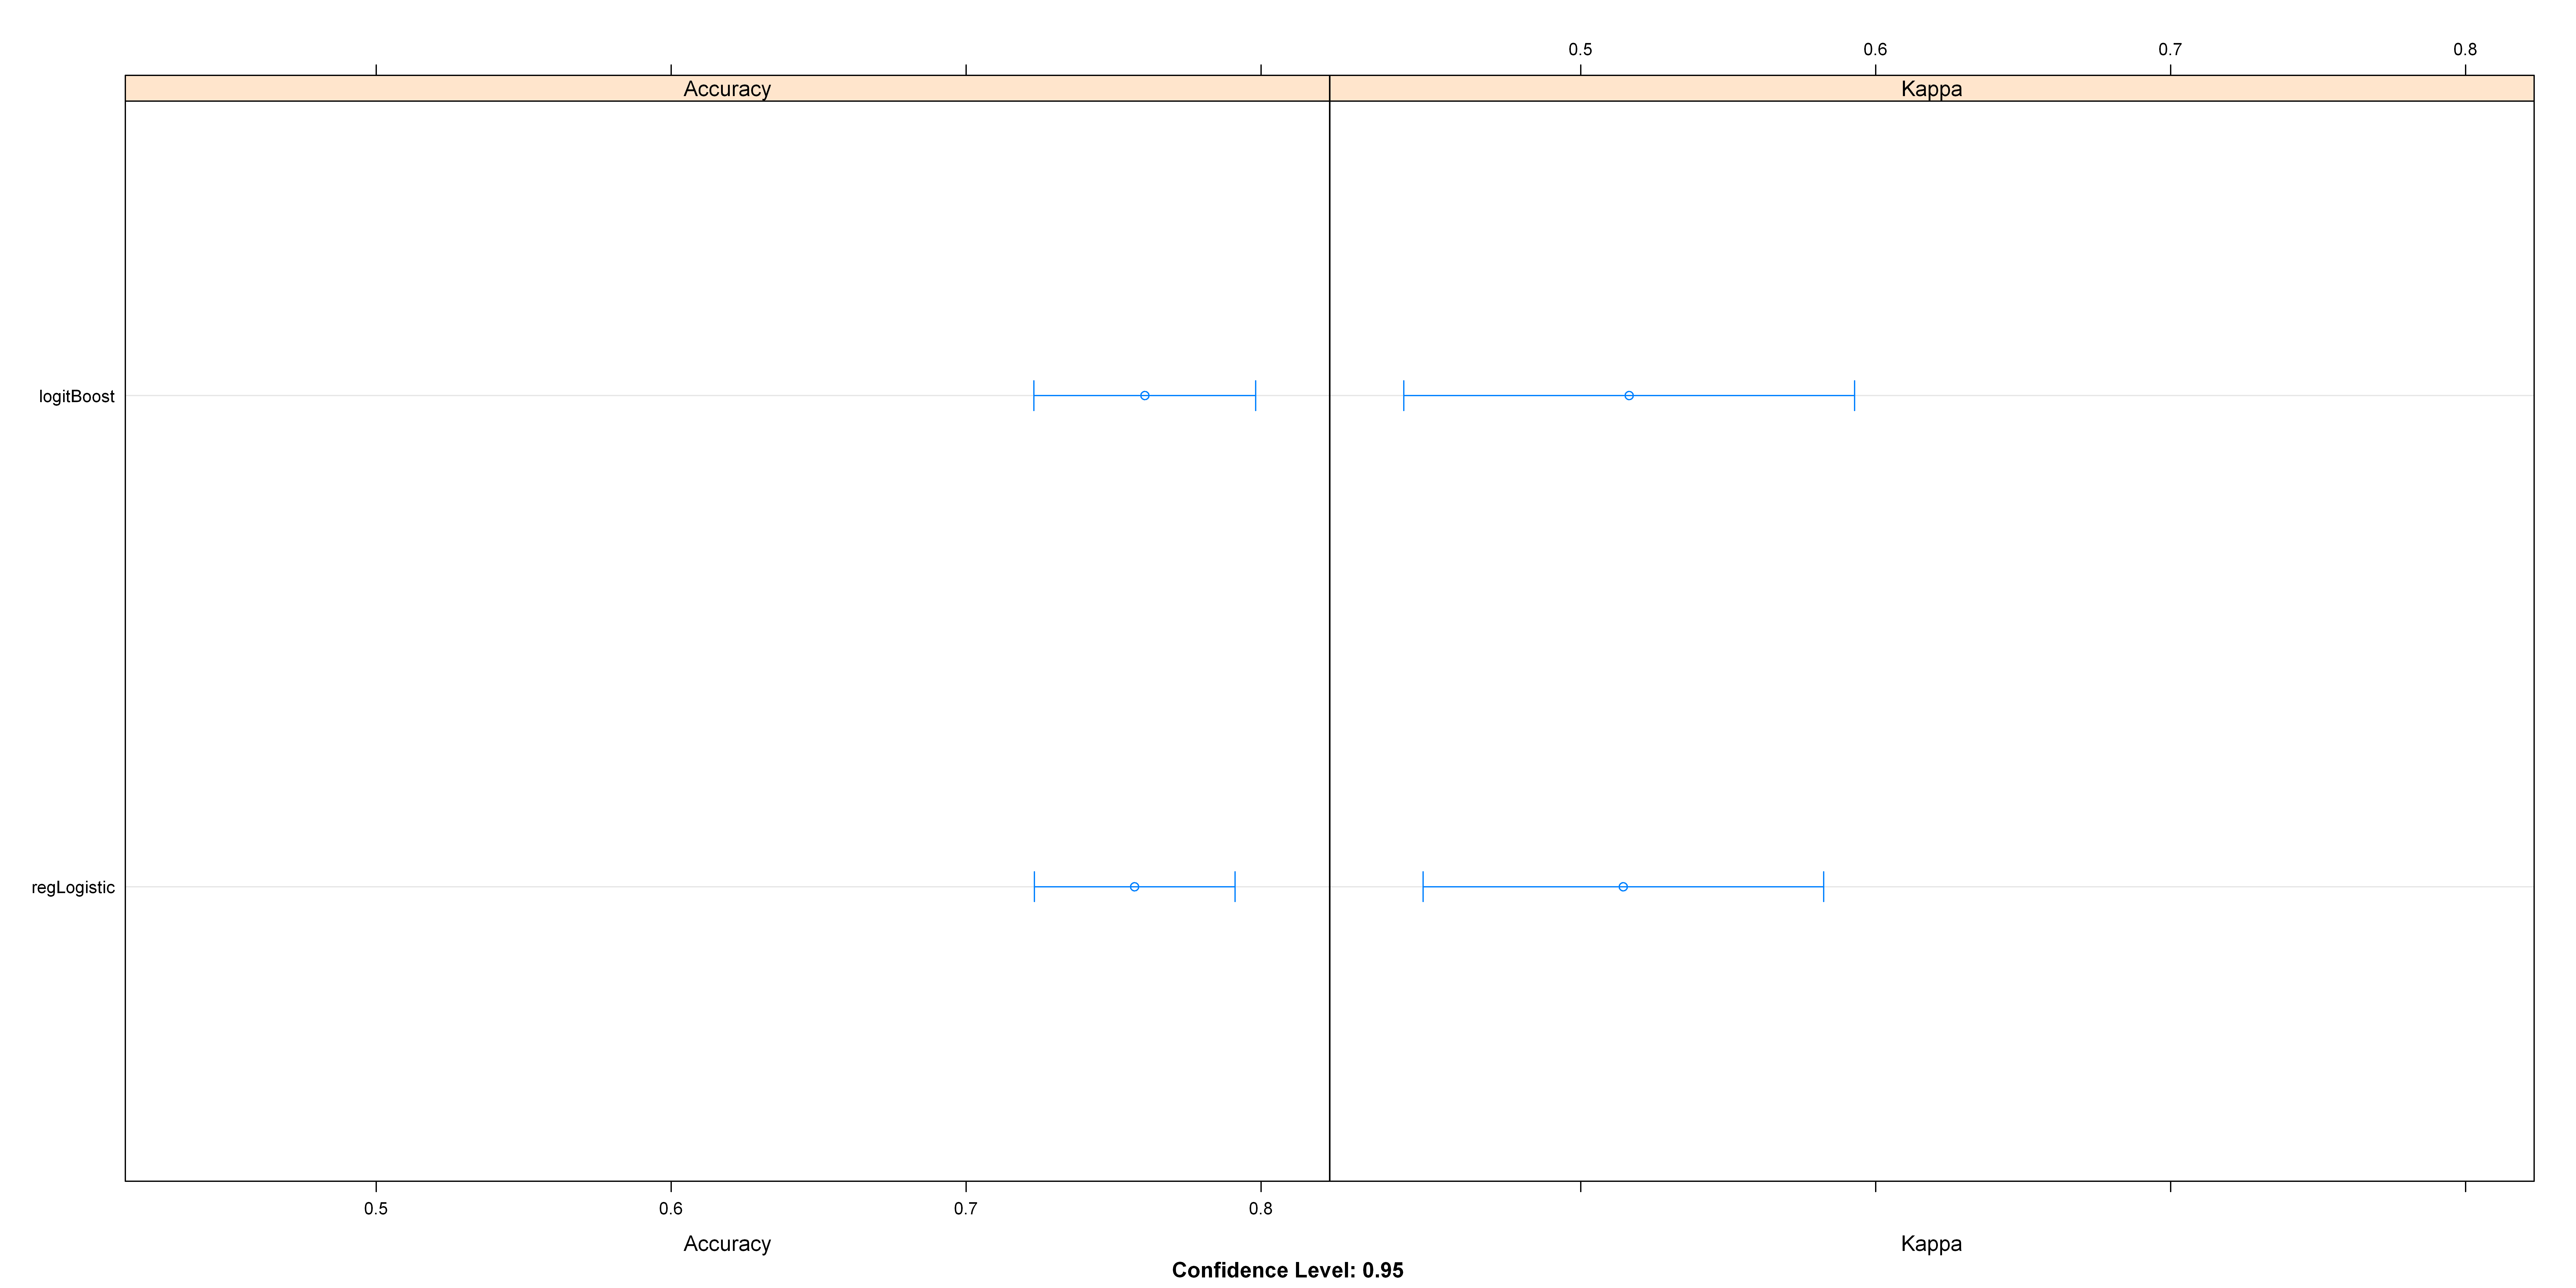

In [19]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

In [22]:
pred_regLogistic <- predict(model_regLogistic,test)   # 53 acc
pred_regLogistic.prob <- predict(model_regLogistic,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_regLogistic) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      93      28
   NotFast   79     144
                                          
               Accuracy : 0.689           
                 95% CI : (0.6371, 0.7375)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 9.653e-13       
                                          
                  Kappa : 0.3779          
                                          
 Mcnemar's Test P-Value : 1.340e-06       
                                          
            Sensitivity : 0.5407          
            Specificity : 0.8372          
         Pos Pred Value : 0.7686          
         Neg Pred Value : 0.6457          
             Prevalence : 0.5000          
         Detection Rate : 0.2703          
   Detection Prevalence : 0.3517          
      Balanced Accuracy : 0.6890          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.5406977            0.8372093            0.7685950 
      Neg Pred Value            Precision               Recall 
           0.6457399            0.7685950            0.5406977 
                  F1           Prevalence       Detection Rate 
           0.6348123            0.5000000            0.2703488 
Detection Prevalence    Balanced Accuracy 
           0.3517442            0.6889535

In [26]:
varImp(model_regLogistic)

ROC curve variable importance

  only 20 most important variables shown (out of 24)

                         Importance
realMELDNa                   100.00
IntraoperativTransfected      82.79
centreCode                    72.78
plasmaPools                   69.59
albumina                      61.53
intermedLactates              60.86
platCountTranspl              59.65
ratioPaO2FiO2                 53.78
surgeryDuration               53.08
presentRefractAscites         51.67
noradrenalineEndSurger        42.21
EPScum                        40.40
new_admWard                   39.46
degenzaPreTra                 37.52
albumInfusOver7Days           27.36
syndromeReperfus              25.26
CRIOprecipitated              24.05
organDonorDrawalSodiemia      17.49
nutritStatus                  11.85
plasmaFresco                  10.82

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



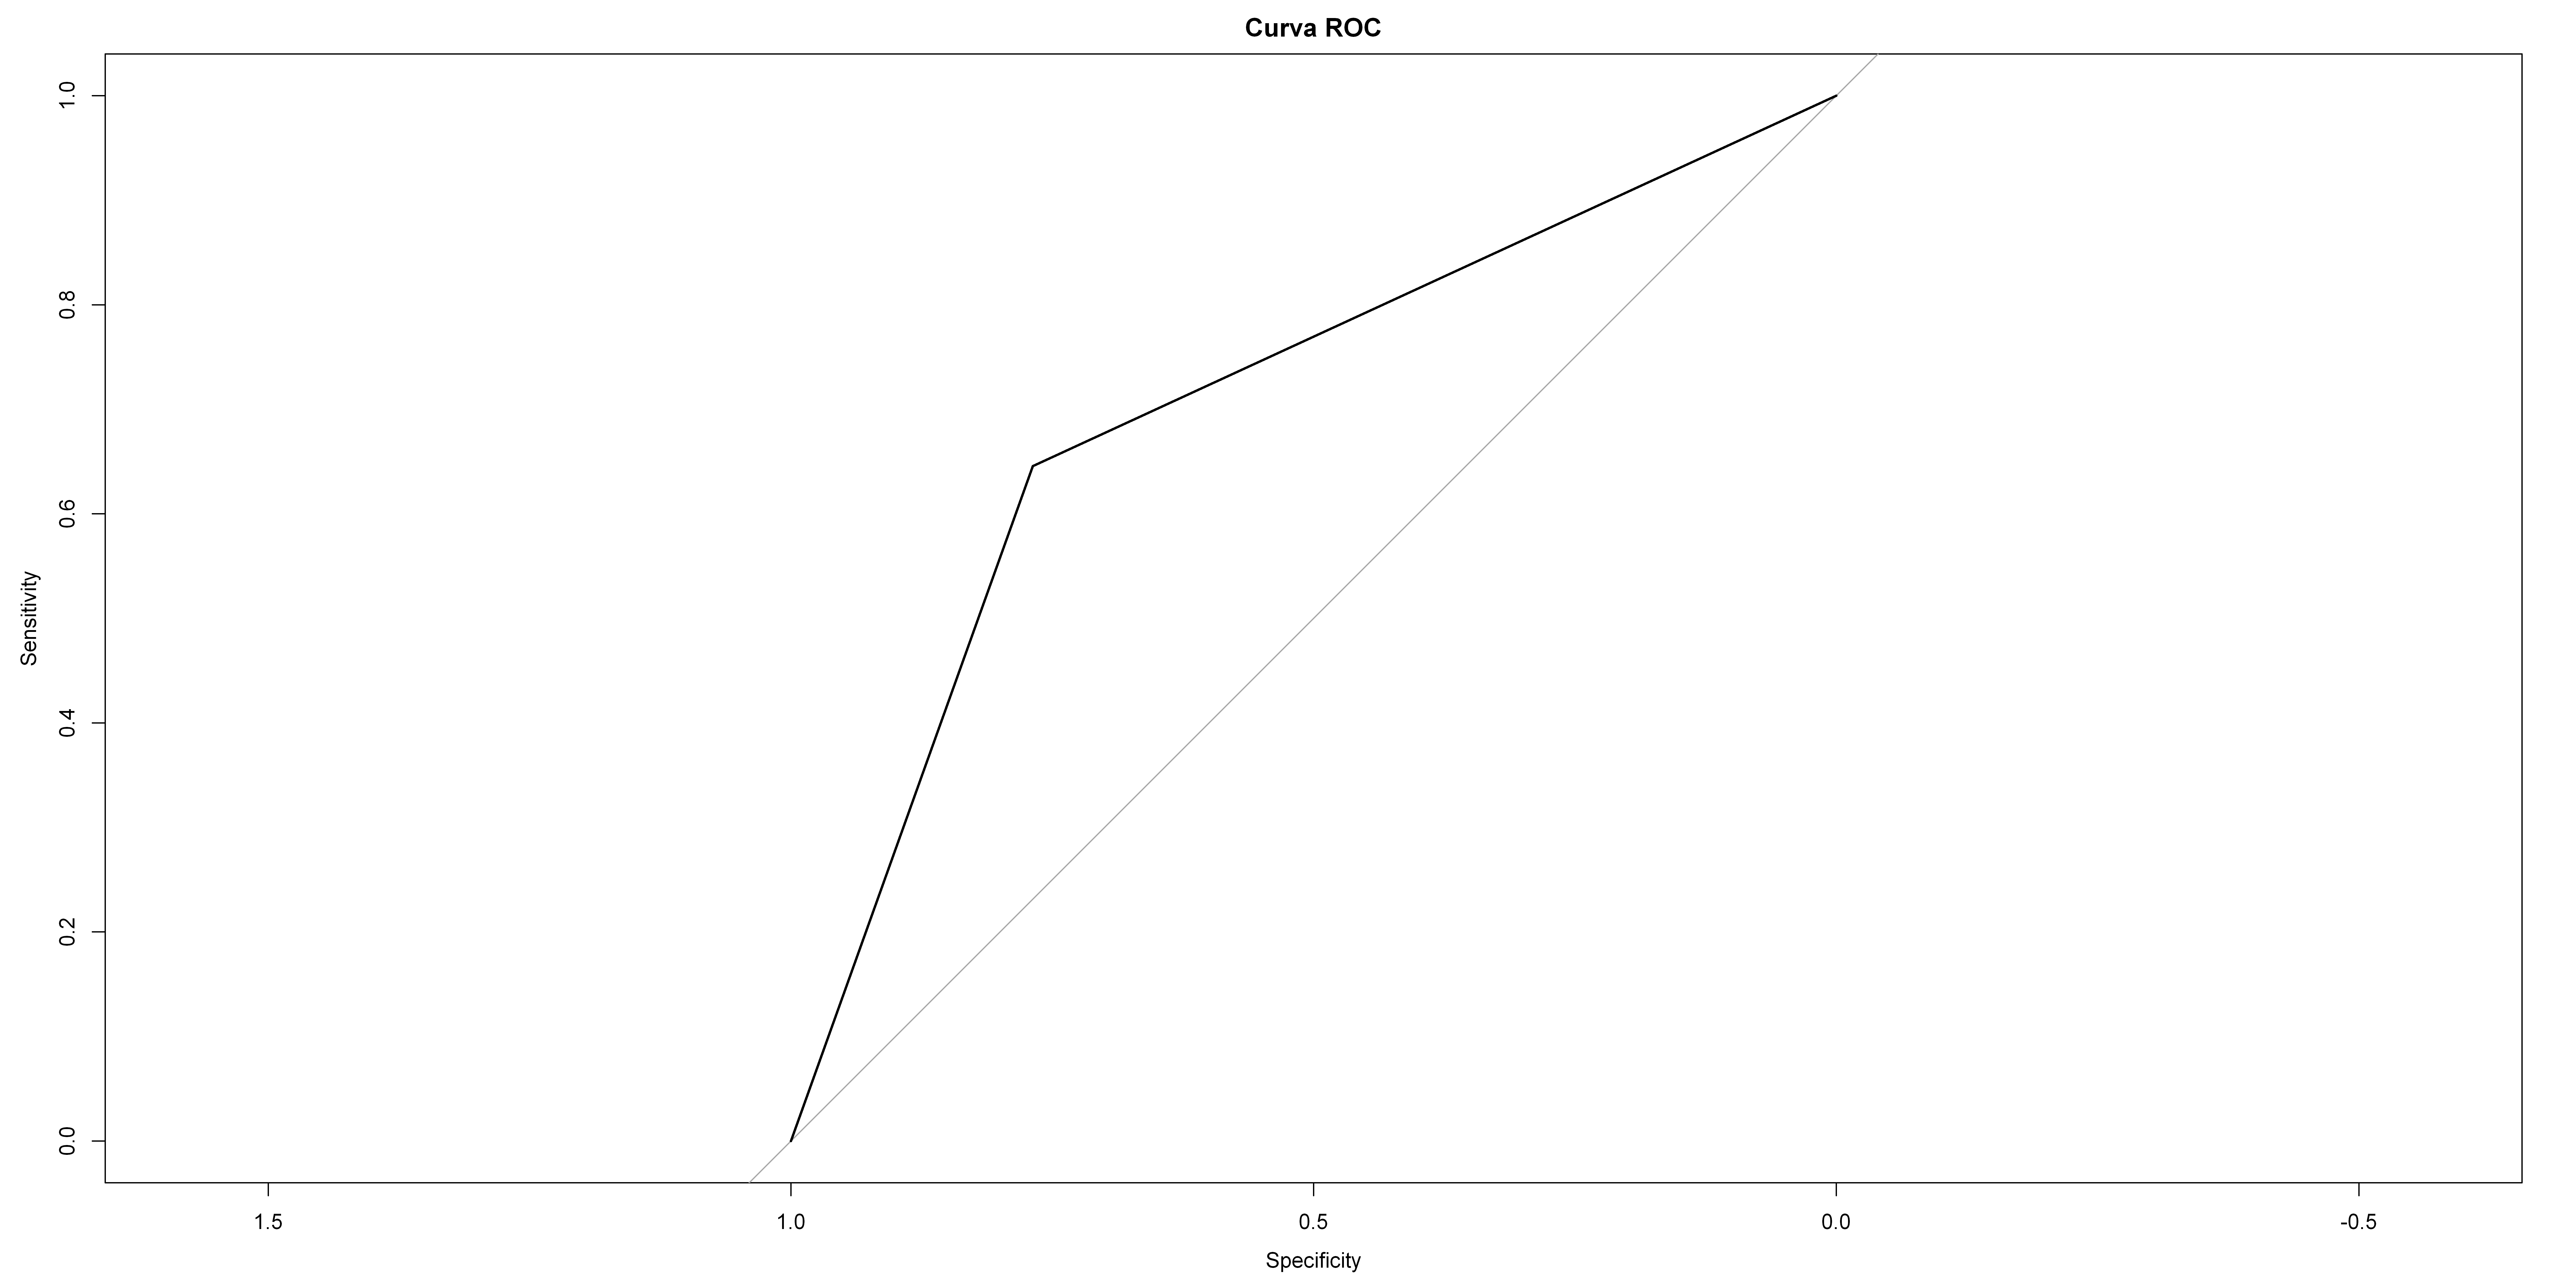

In [23]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [24]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 121 controls (TestClasses fast) < 223 cases (TestClasses NotFast).
Area under the curve: 0.7072